# Project 1: Pokémon Analysis
 


# Prefactory Remarks

- [x] **Create a virtual environment to download the packages**

In [ ]:
# You don't have to do this, it's just safer.

# Install virtualenv (virtual environment):

# !pip install virtualenv

# Create a virtual environment named "myenv":

# !python -m venv myenv

# Activate the virtual environment:

# myenv\Scripts\activate (Windows)
# source myenv/bin/activate (macOS/Linux)

# Upgrade pip and install essential data science libraries inside the virtual environment:

# !myenv/bin/python -m pip install --upgrade pip  
# !myenv/bin/python -m pip install numpy pandas matplotlib seaborn scikit-learn scipy statsmodels jupyterlab plotly openpyxl xlrd tensorflow keras torch torchvision pyspark ipykernel

# Add the virtual environment as a Jupyter kernel:

# !myenv/bin/python -m ipykernel install --user --name=myenv --display-name "Python (myenv)"

# Deactivate the virtual environment (Run this in the terminal):

# deactivate

- [x] **Libraries we might need to install or upgrade**

In [ ]:
# If you don't care to create a virtual environment, here is what you need to do to download the libraries

# Run these directly in a cell to download the libraries:

#!pip install tensorflow
#!pip install pyspark
#!pip install scikit-optimize (for skopt)
#!pip install missingno
#!pip install seaborn
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install scikit-learn

# To update them, run this (with your desired library):

#!pip install --upgrade scikit-learn

- [x] **Tips for rearranging your Notebook**

- Hold ctrl+shift and click on the various cells you want to move, then press the arrow keys to move them up or down.

# Data Analysis (Using the Pandas Library)

## 1. Visualize the data

- [x] **View the data**

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("pokemon_data.csv")

df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


- [x] **Check the data types**

In [179]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

- [x] **Work with the data in chunks**

In [3]:
# for df in pd.read_csv('pokemon_data.csv', chunksize=5):     # 5 rows at a time
#     print(df)

- [x] **Count Occurrences**

In [245]:
df["Generation"].value_counts()
df["Type 1"].value_counts()
df["Type 2"].value_counts()             # the amount of times each type appears in 'Type 2'
df["Legendary"].value_counts()

Legendary
False    735
True      65
Name: count, dtype: int64

## 2. Reorganizing and Cleaning the Data

- [x] **Check for missing values**

In [13]:
df.isnull().sum()   # As we can see, there are missing values in Type 2 only, which is normal

# df["Loan Amount"].isnull().value_counts()

#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

- [x] **Check for NaN values in all of the columns, then in a specific set of columns**

In [7]:
# In all columns

print("In all columns:")

df = pd.read_csv("pokemon_data.csv")

df

nan_counts = df.isna().sum()

print(nan_counts[nan_counts > 0])

# In a specific set of columns

print("In a specific set of columns:")

X = df[['HP','Speed','Generation','Legendary']]

nan_counts = X.isna().sum()

print(nan_counts[nan_counts > 0])

# We only see NaN values in the Type 2 column, which is perfectly fine, it's supposed to be like that

In all columns:
Type 2    386
dtype: int64
In a specific set of columns:
Series([], dtype: int64)


- [x] **Rearranje and Rename Columns**

In [270]:
df = pd.read_csv("pokemon_data.csv")

df["Name 2"] = df["Name"]          # Get a new column which is a copy of the column name

new_order = [df.columns[0]] + [df.columns[-1]] + list(df.columns[1:-1])

df_no = df[new_order]

df_no


,#,Name 2,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


- [x] **Drop Columns that are Unnecessary**

In [273]:
df_no.drop("Name 2", axis=1, inplace=True)  

# df = df.drop(columns=["Name 2"])  also works

df_no

C:\Users\micro\AppData\Local\Temp\ipykernel_8812\3629617472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no.drop("Name 2", axis=1, inplace=True)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


- [x] **Fix all of the inconsistencies in the "Name" column (Mega, Forme, Mode, Wormadam, Rotom, Hoopa, Primal, and Kyurem)**

In [22]:
# In pokemon, they're really called "forme", but let's assume this is in fact a mistake

df = pd.read_csv("pokemon_data.csv")

df.loc[df["Name"].str.contains('Mega')]   # searches for all of the Megas

df["Name"] = df["Name"].str.replace(r"(\w+)(Mega \w+)", r"\2", regex=True)  

df

# Let's check the Hoopa

df.loc[df["Name"].str.contains("Hoopa")]

df["Name"]=df["Name"].str.replace(r"(\w+)(Hoopa \w+)", r"\2", regex=True)

df.loc[df["Name"].str.contains("Hoopa")]

# Now, let's check Shaymin  (this is a part of forme, but leave it here as an extra example)

df.loc[df["Name"].str.contains("Shaymin")]

df["Name"] = df["Name"].str.replace(r"(?i)(\bShaymin)(Land|Sky)\s*Forme", r"\1 (\2 Form)", regex=True)

df.loc[df["Name"].str.contains("Shaymin")]

# Let's check all the "formes"

df.loc[df["Name"].str.contains("Forme")]

df["Name"] = df["Name"].str.replace(
    r"(?i)(\b[A-Za-z]+)(Normal|Attack|Defense|Speed|Altered|Origin|Incarnate|Therian|Primal|Ash|Ordinary|Resolute|Aria|Pirouette|Blade|Shield|50%)\s*Forme",
    r"\1 (\2 Form)",
    regex=True
)



df.loc[df["Name"].str.contains("Form")]


# Now we search for the "Primal"

df.loc[df["Name"].str.contains("Primal")]

df["Name"] = df["Name"].str.replace(r"(\w+)(Primal \w+)", r"\2", regex=True)  

df.loc[df["Name"].str.contains("Primal")]

# Now, let's check "Mode"

df.loc[df["Name"].str.contains("Mode")]

df["Name"] = df["Name"].str.replace(r"(?i)(\bDarmanitan)(Standard|Zen)\s*Mode", r"\1 (\2 Mode)", regex=True)

df.loc[df["Name"].str.contains("Mode")]

# Now, let's check "Wormadam"

df.loc[df["Name"].str.contains("Wormadam")]

df["Name"] = df["Name"].str.replace(r"(?i)(\bWormadam)(Plant|Sandy|Trash)\s*Cloak", r"\1 (\2 Mode)", regex=True)

df.loc[df["Name"].str.contains("Wormadam")]

# Now, for Rotom

df.loc[df["Name"].str.contains("Rotom")]

df["Name"] = df["Name"].str.replace(r"(\w+)((Heat|Wash|Frost|Fan|Mow) \w+)", r"\2", regex=True)  

df.loc[df["Name"].str.contains("Rotom")]

# And finally, Kyurem

df.loc[df["Name"].str.contains("Kyurem")]

df["Name"] = df["Name"].str.replace(r"(\w+)((Black|White) \w+)", r"\2", regex=True)

df.loc[df["Name"].str.contains("Kyurem")]


# Use this for general cleaning: (works for various cases)

#df["Name"] = df["Name"].str.replace(
#    r"(?i)(?:mega\s*)?(\w+)\s*mega\s*(\w*)", r"Mega \1 \2", regex=True
#).str.replace(r"\s+", " ").str.strip()  # Ensures clean spacing

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
458,413,Wormadam (Plant Mode),Bug,Grass,60,59,85,79,105,36,4,False
459,413,Wormadam (Sandy Mode),Bug,Ground,60,79,105,59,85,36,4,False
460,413,Wormadam (Trash Mode),Bug,Steel,60,69,95,69,95,36,4,False


- [x] **Search for names that may have more than two words and clean them if necessary**

In [107]:
df[df["Name"].str.count(r"\s+") >= 2]  # Filters names with 2+ spaces (3+ words)

# They have all been fixed

df = pd.read_csv("pokemon_data.csv")

df.tail(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
790,714,Noibat,Flying,Dragon,40,30,35,45,40,55,6,False
791,715,Noivern,Flying,Dragon,85,70,80,97,80,123,6,False
792,716,Xerneas,Fairy,NaN,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,126,131,95,131,98,99,6,True
794,718,Zygarde50% Forme,Dragon,Ground,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


- [x] **Add Zygarde (Complete Form) and Zygarde (10%) with the correct values (research in Pokemon Database website) and in the correct index position in the dataframe (10% form should come before the 50% form, and the complete form should go after the 50% form)**

In [230]:
# ChatGPT didn't do this one correctly

df.loc[df["Name"].str.contains("Zygarde")]

new_row_1 =[718, "Zygarde (10% Form)", "Dragon", "Ground", 54, 100, 71, 61, 85, 115, 6, True]
new_row_2 =[718, "Zygarde (Complete Form)", "Dragon", "Ground", 216, 100, 121, 91, 95, 85, 6, True]

df_zygardes = df.copy()
df_zygardes.loc[793.5] = new_row_1
df_zygardes = df_zygardes.sort_index().reset_index(drop=True)
df_zygardes.loc[795.5] = new_row_2
df_zygardes = df_zygardes.sort_index().reset_index(drop = True)

df_zygardes.tail(10)



,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
792,716,Xerneas,Fairy,NaN,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,126,131,95,131,98,99,6,True
794,718,Zygarde (10% Form),Dragon,Ground,54,100,71,61,85,115,6,True
795,718,Zygarde (50% Form),Dragon,Ground,108,100,121,81,95,95,6,True
796,718,Zygarde (Complete Form),Dragon,Ground,216,100,121,91,95,85,6,True
797,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
798,719,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
799,720,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
800,720,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
801,721,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


- [x] **Delete rows with repeated names (Remove duplicate rows and keep the ones that have the highest BST if there are many with the same name but different BSTs)**

In [148]:
# These rows don't exist, but if they did, we'd do this:

df["BST"] = df.iloc[:,4:10].sum(axis=1)

df = df.drop_duplicates(subset="Name", keep="first")   # Keep the first instance of a name and delete all others

df = df.loc[df.groupby("Name")["BST"].idxmax()]  # Remove duplicates and keep the highest BST

- [x] **Reset the index in this dataframe to the Pokédex number "#"**

In [5]:
# Now, column 0 will not exist and '#' will serve as the main index, effectively becoming column 0

df = df.set_index("#")

df

# Later on, we're going to read the csv file again, not the clean one here for different purposes, but I'll leave the cleaning tactics here nevertheless

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True


- [x] **Save this new dataset (as clean_pokemon_data.csv)**

In [232]:
df_clean = df_zygardes

df_clean.to_csv("clean_pokemon_data.csv")

# It has now been saved

- [x] **Reopen the dataframe to see if everything is fine**

In [237]:
df = pd.read_csv("clean_pokemon_data.csv")

df

# Must remove this "Unnamed: 0" column, 
# This typically appears when you save or export a DataFrame with the index included, and pandas doesn't have a specific name for that column.

df = df.drop(columns=["Unnamed: 0"])

# df.to_csv("clean_pokemon_data.csv")

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
797,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
798,719,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
799,720,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
800,720,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


- [x] **Change the Legendary column by allocating a 0 to "False" and a 1 to "True"**

In [8]:
# Here, the Legendary column has the Boolean values True and False,
# hence we can't state them as "True" and "False" in the dataframe (treated as a dictionary) 
# but True and False, without quotation marks

df["Legendary"] = df["Legendary"].map({True:1,False:0})

df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,1
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,1
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,1
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,1


## 3. Exploratory Data Analysis

- [x] **Create a dataframe that only has the Pokemon and their respective Mega evolutions**

In [87]:
mega_df = df.loc[df["Name"].str.contains("Mega")]    # create a df with only megas

mega_df["Base name"] = mega_df["Name"].str.replace(r"^Mega\s*|\s*[XY]$", "", regex=True)  # Create a column with just their base name

# Now search for that base name in the original df and create a new one that has the rows of Pokemon that can Mega evolve

base_df = df[df["Name"].isin(mega_df["Base name"])]

# Now merge both

combined_df = pd.concat([base_df, mega_df], ignore_index=True)

combined_df["BST"] = combined_df.iloc[:,4:10].sum(axis=1)

# See to it that the base names appear before the megas

mega_candidates = combined_df.sort_values(by=["#","BST"], ascending = [True,True]).drop(columns="Base name")


mega_candidates

C:\Users\micro\AppData\Local\Temp\ipykernel_22092\1242304355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mega_df["Base name"] = mega_df["Name"].str.replace(r"^Mega\s*|\s*[XY]$", "", regex=True)  # Create a column with just their base name


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST
0,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
46,3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
1,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,534
47,6,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
48,6,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,475,Mega Gallade,Psychic,Fighting,68,165,95,65,115,110,4,False,618
44,531,Audino,Normal,NaN,103,60,86,60,86,50,5,False,445
93,531,Mega Audino,Normal,Fairy,103,60,126,80,126,50,5,False,545
45,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600


- [x] **Find the best team per type using on BST as the metric.** (Teams can only have 6 Pokemon and no Legendaries allowed this time)

In [91]:
# Define the BST column

df = pd.read_csv("clean_pokemon_data.csv")

df["BST"] = df["HP"] + df["Attack"] + df["Defense"]+df["Speed"] + df["Sp. Atk"] + df["Sp. Def"]

all_types = set(df["Type 1"].unique())   # this is a dictionary

Top_team_by_type = {}

for u_type in all_types:
    unique_type = df.loc[((df["Type 1"] == u_type) | (df["Type 2"] == u_type)) & (df["Legendary"] == False)]

    top_6 = unique_type.sort_values(by="BST", ascending = False).head(6).drop(columns="Unnamed: 0")

    Top_team_by_type[u_type] = top_6
   

Top_team_by_type["Fire"]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST
7,6,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
8,6,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
279,257,Mega Blaziken,Fire,Fighting,80,160,80,130,80,100,3,False,630
248,229,Mega Houndoom,Dark,Fire,75,90,90,140,90,115,2,False,600
354,323,Mega Camerupt,Fire,Ground,70,120,100,145,105,20,3,False,560
64,59,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False,555


In [33]:
# Another Solution, this one still returns the best ones but not in descending order

all_types = set(df["Type 1"].unique()) # this is a dictionary

Top_picks={}

for u_type in all_types:
    top_6 = df.loc[((df["Type 1"] == u_type) | (df["Type 2"] == u_type)) & (df["Legendary"] == False)].sort_values(by="BST", ascending = True).tail(6)
    Top_picks[u_type] = top_6

Top_picks["Bug"]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST
520,469,Yanmega,Bug,Flying,86,76,86,116,56,95,4,False,515
698,637,Volcarona,Bug,Fire,85,60,65,135,105,100,5,False,550
232,214,HeracrossMega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False,600
717,649,Genesect,Bug,Steel,71,120,95,120,95,99,5,False,600
137,127,PinsirMega Pinsir,Bug,Flying,65,155,120,65,90,105,1,False,600
229,212,ScizorMega Scizor,Bug,Steel,70,150,140,65,100,75,2,False,600


- [x]  **Find the best overall team across generations.**

In [14]:
# Now sort them by generation as well

df["BST"] = df["HP"] + df["Attack"] + df["Defense"]+df["Speed"] + df["Sp. Atk"] + df["Sp. Def"]

all_types = set(df["Type 1"].unique())

all_gens = set(df["Generation"].unique())

Top_6_by_gen = {}

for u_type in all_types:
    for gen in all_gens:
        top_6 = df.loc[((df["Type 1"] == u_type) | (df["Type 2"] == u_type)) & (df["Legendary"] == False) & (df["Generation"] == gen)].sort_values(by="BST", ascending= False).head(6)
        Top_6_by_gen[(u_type, gen)] = top_6

Top_6_by_gen["Fire",4]



,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST
518,467,Magmortar,Fire,NaN,75,95,67,125,95,83,4,False,540
437,392,Infernape,Fire,Fighting,76,104,71,104,71,108,4,False,534
532,479,Heat Rotom,Electric,Fire,50,65,107,105,107,86,4,False,520
436,391,Monferno,Fire,Fighting,64,78,52,78,52,81,4,False,405
435,390,Chimchar,Fire,NaN,44,58,44,58,44,61,4,False,309


- [x] **Compare legendary vs non-legendary Pokémon in teams.**

In [37]:
# Create a for loop for legendaries as well

all_types = set(df["Type 1"].unique())

all_gens = set(df["Generation"].unique())

leg_status = set(df["Legendary"].unique())


Top = {}

for u_type in all_types:
    for gen in all_gens:
        for leg in leg_status:
            top_6 = df.loc[((df["Type 1"] == u_type) | (df["Type 2"] == u_type)) & (df["Generation"] == gen)
            & (df["Legendary"] == leg)].sort_values(by="BST", ascending=False).head(6)
            Top[(u_type,gen,leg)] = top_6

Top["Fire",4,True]

Top["Fire",4,False]

# By summing the BST, obviously the non-legendaries always win, we can ascertain this just by simple observation. 

# Let's sum the BST of all legendaries and non-legendaries and then compare. Learn dictionaries like chatGPT was doing.



,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST
518,467,Magmortar,Fire,NaN,75,95,67,125,95,83,4,False,540
437,392,Infernape,Fire,Fighting,76,104,71,104,71,108,4,False,534
532,479,RotomHeat Rotom,Electric,Fire,50,65,107,105,107,86,4,False,520
436,391,Monferno,Fire,Fighting,64,78,52,78,52,81,4,False,405
435,390,Chimchar,Fire,NaN,44,58,44,58,44,61,4,False,309


- [x] **Identify the best mono-type and dual-type teams (also by generation and Legendary status)**.

In [39]:
# Mono-type teams

all_types = set(df["Type 1"].unique())      # dictionary with all types

all_gens = set(df["Generation"].unique())   # dictionary with all generations
 
leg_status = set(df["Legendary"].unique())  # dictionary with all Legendary statuses


Top_mono = {}


for u_type in all_types:
    for gen in all_gens:
        for leg in leg_status:
            top_6 = df.loc[((df["Type 1"] == u_type) & (df["Type 2"].isna()))
            & (df["Generation"] == gen) 
            & (df["Legendary"] == leg)].sort_values(by="BST", ascending=False).head(6)
            Top_mono[(u_type,gen,leg)] = top_6


Top_dual = {}    # chatGPT did a mistake here, yay I guess (23/02/2025)

for u_type in all_types:
    for gen in all_gens:
        for leg in leg_status:
            top_6 = df.loc[
                (((df["Type 1"] == u_type) & (df["Type 2"].notna())) |  # Type 1 matches u_type and Type 2 is not NaN
                ((df["Type 2"] == u_type) & (df["Type 1"].notna())))  # Type 2 matches u_type and Type 1 is not NaN
                & (df["Generation"] == gen) & (df["Legendary"] == leg)
            ].sort_values(by="BST", ascending=False).head(6)
            Top_dual[(u_type, gen, leg)] = top_6

Top_mono["Fire",4,False]

# Top_dual["Fire",4,False]



,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST
518,467,Magmortar,Fire,NaN,75,95,67,125,95,83,4,False,540
435,390,Chimchar,Fire,NaN,44,58,44,58,44,61,4,False,309


## 4. Visualizations 


- [x] **Histogram:** Distribution of BST across all Pokémon. 

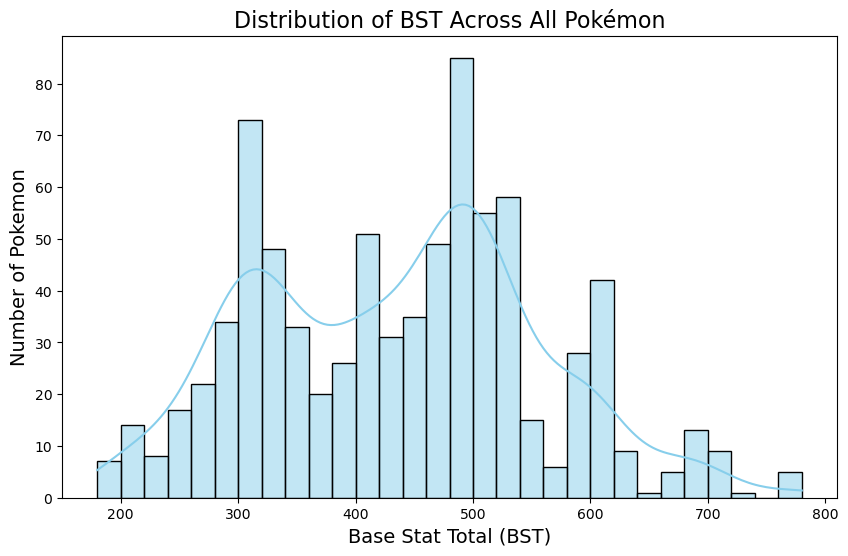

In [42]:
# This shows how many Pokemon have certain BSTs


plt.figure(figsize=(10, 6))
sns.histplot(df['BST'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of BST Across All Pokémon', fontsize=16)
plt.xlabel('Base Stat Total (BST)', fontsize=14)
plt.ylabel('Number of Pokemon', fontsize=14)
plt.show()

- [x] **Boxplot:** Compare BST across generations.

C:\Users\micro\AppData\Local\Temp\ipykernel_8812\2063447211.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Generation', y='BST', data=df, palette='Set2')


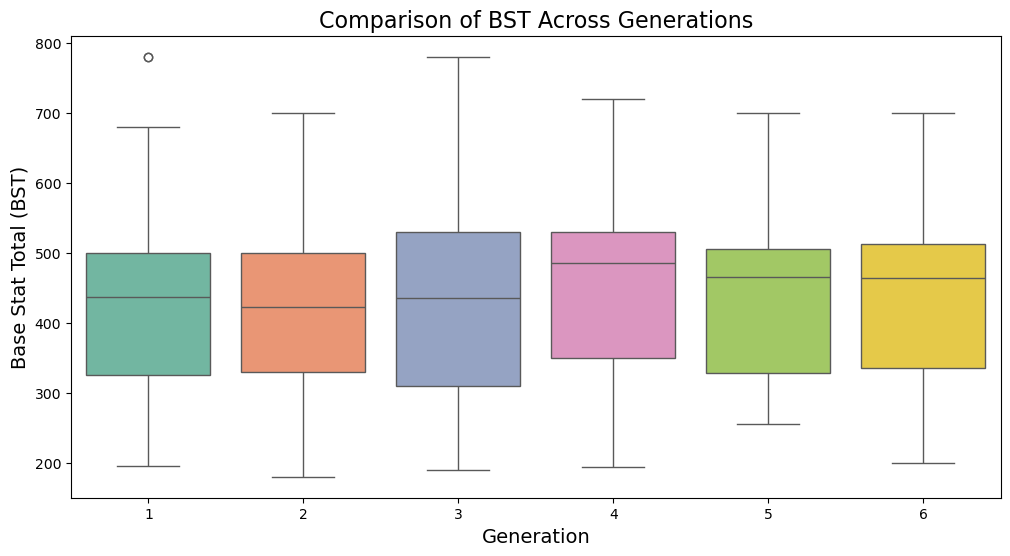

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Generation', y='BST', data=df, palette='Set2')
plt.title('Comparison of BST Across Generations', fontsize=16)
plt.xlabel('Generation', fontsize=14)
plt.ylabel('Base Stat Total (BST)', fontsize=14)
plt.show()

- [x] **Boxplot:** Compare BST for each Pokémon type.

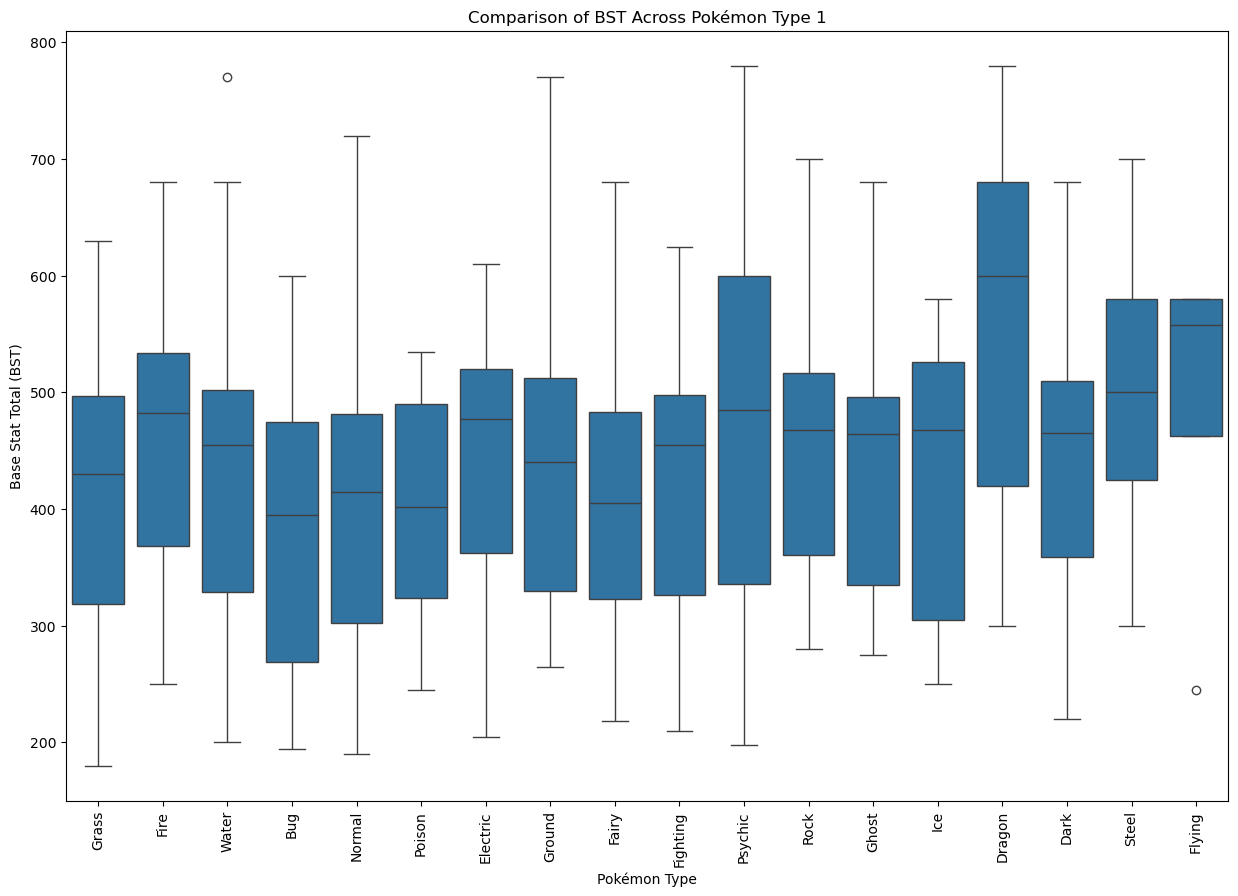

In [46]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Type 1', y='BST', data=df)
plt.xticks(rotation=90)
plt.title('Comparison of BST Across Pokémon Type 1')
plt.xlabel('Pokémon Type')
plt.ylabel('Base Stat Total (BST)')

plt.show()

- [x] **Pie Chart:** Proportion of each Pokémon type.

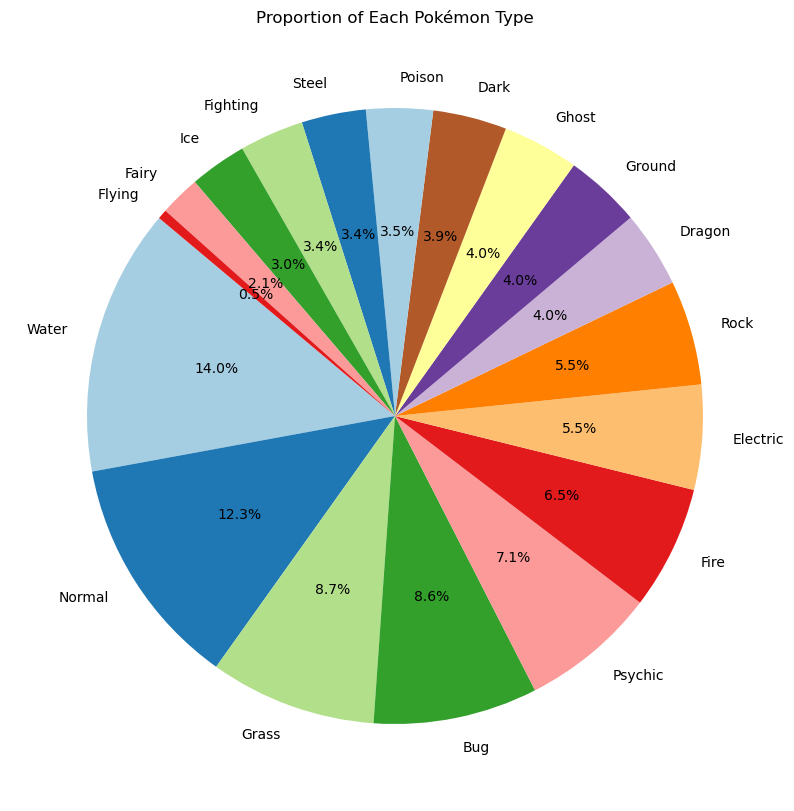

In [232]:
type_counts = df['Type 1'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of Each Pokémon Type')
plt.show()

- [x] **Pie Chart:** Proportion of each type 2, given a specific type 1.  

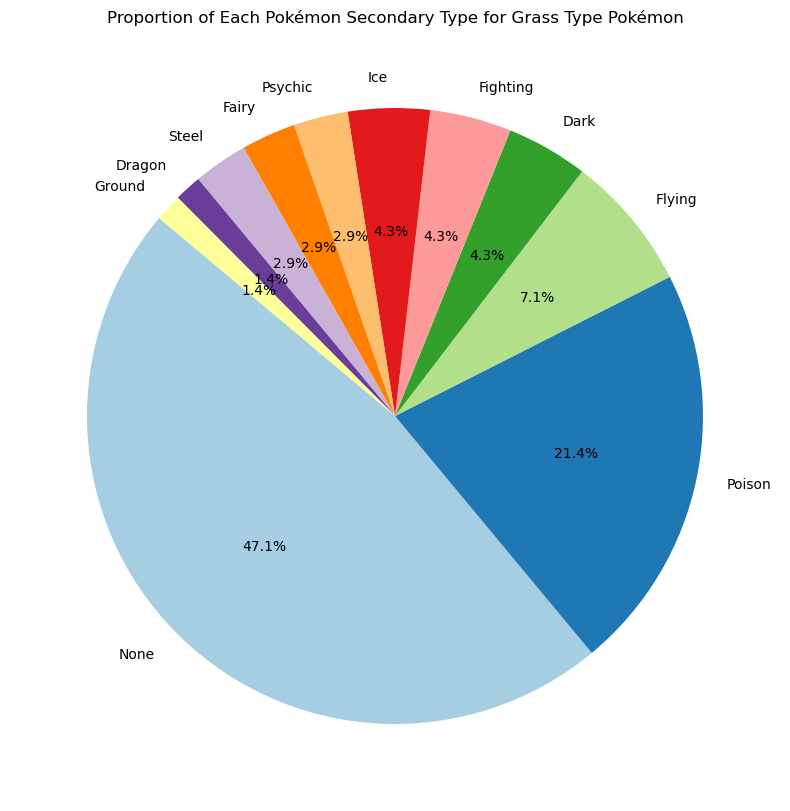

In [275]:
def plot_type2_distribution(df, type1):
    df_selected = df.loc[df["Type 1"] == type1]
    type_counts_selected = df_selected['Type 2'].fillna("None").value_counts()
    if type_counts_selected.empty:
        print(f"No Pokémon found with Type 1 = {type1}.")
        return
    plt.figure(figsize=(10, 10))
    plt.pie(type_counts_selected, labels=type_counts_selected.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f'Proportion of Each Pokémon Secondary Type for {type1} Type Pokémon')
    plt.show()

plot_type2_distribution(df, "Grass")

- [x] **Bar Chart:** Average BST per type.  

C:\Users\micro\AppData\Local\Temp\ipykernel_8812\1264691385.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_bst_per_type.index, y=avg_bst_per_type.values, palette='viridis')


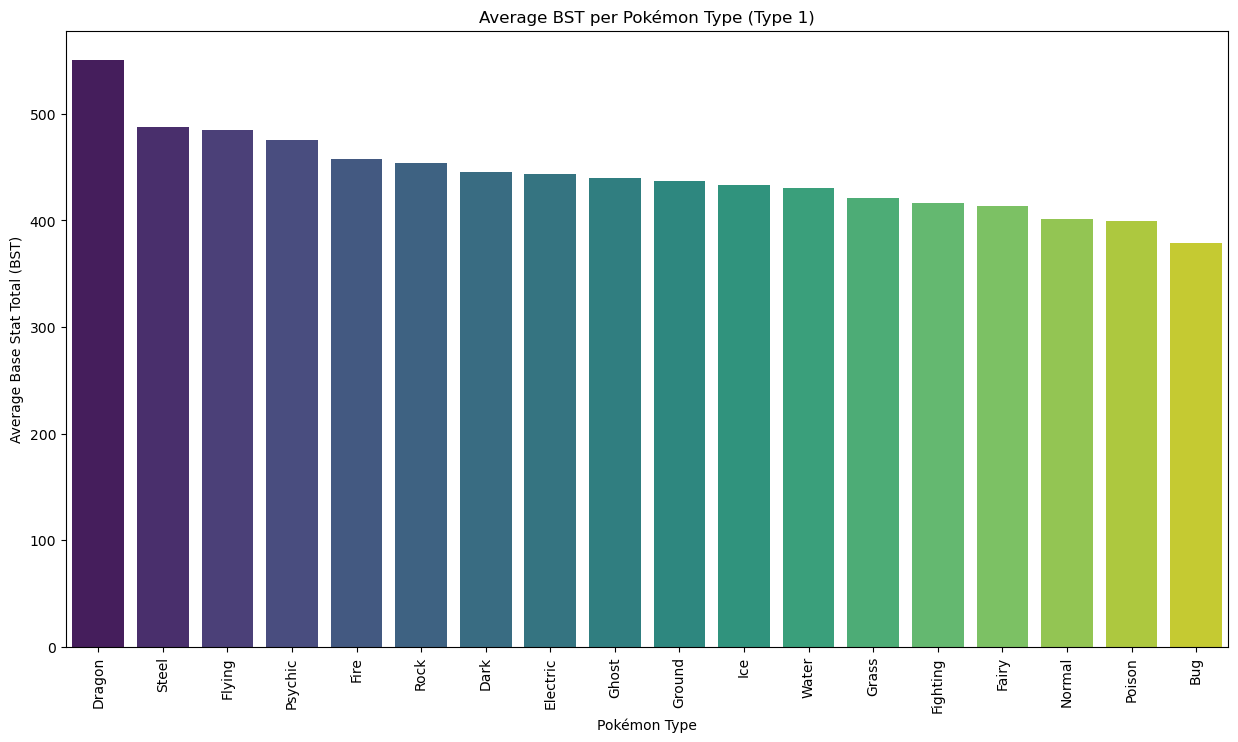

In [51]:
# Just using Type 1

avg_bst_per_type = df.groupby('Type 1')['BST'].mean().sort_values(ascending=False)


plt.figure(figsize=(15, 8))
sns.barplot(x=avg_bst_per_type.index, y=avg_bst_per_type.values, palette='viridis')
plt.xticks(rotation=90)   # Rotate x-axis labels for better readability
plt.title('Average BST per Pokémon Type (Type 1)')
plt.xlabel('Pokémon Type')
plt.ylabel('Average Base Stat Total (BST)')
plt.show()

## 5. String Manipulations

- [x] **Remove all Mega Pokémon from the dataframe**

In [333]:
df = pd.read_csv("clean_pokemon_data.csv")

df.loc[df["Name"].str.contains('Mega')]  # Shows every row with Mega in the name

df.drop(df[df["Name"].str.contains("Mega", na=False)].index, inplace=True)  # deletes all rows with 'Mega' in them

df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
794,718,Zygarde (50% Form),Dragon,Ground,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
797,720,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


- [x] **Select all Pokemon names that start with a 'Pi' and are Flying type, put them in a list**

In [164]:
import re

df = pd.read_csv("clean_pokemon_data.csv")

Pi_fly = df.loc[(df["Name"].str.match(r"^Pi[A-Z]", flags=re.I)) &  ((df["Type 1"] == "Flying") | (df["Type 2"] == "Flying")),  "Name"]

Pi_fly_names = Pi_fly.tolist()

Pi_fly_names

['Pidgey',
 'Pidgeotto',
 'Pidgeot',
 'PidgeotMega Pidgeot',
 'PinsirMega Pinsir',
 'Pidove']

- [x] **Change names in Type 1 (Fire->Lava) and Type 2 (Psychic->Light) columns**

In [95]:

# normal syntax:

# df[["Type 1", "Type 2"]] = df[["Type 1", "Type 2"]].replace("Fire", "Lava")

# if you have a lot of columns but still want to be specific:

df.iloc[:,2:4].replace("Fire", "Lava") 

df.iloc[:,2:4].replace("Psychic","Light")

#  switches everywhere in the df:

# df = df.applymap(lambda x: "Lava" if x == "Fire" else x)   


df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST,Cluster,Stats Sum,Stats Std
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,0,318,8.640988
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405,0,405,8.902247
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525,2,525,8.902247
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625,2,625,18.747592
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309,0,309,8.995369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600,2,600,40.824829
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700,2,700,37.267800
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600,2,600,32.659863
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680,2,680,42.295258


## 6. NumPy Manipulation  

- [x] **Convert Pokémon stats into NumPy arrays**  

In [16]:
stats_np = df.iloc[:,4:10].to_numpy()   # turn the columns and rows to an array (matrix) shape

stats_sum = np.sum(stats_np, axis=1)   # sum the stats, creating another version of the BST column

df['Stats Sum'] = stats_sum

stats_std = np.std(stats_np, axis=1)
df['Stats Std'] = stats_std             # This should be the same as the Balance column, but that isn't working

df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST,Stats Sum,Stats Std
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,318,8.640988
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405,405,8.902247
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525,525,8.902247
3,3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625,625,18.747592
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309,309,8.995369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600,600,40.824829
796,719,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700,700,37.267800
797,720,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600,600,32.659863
798,720,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680,680,42.295258


- [] **Notice the patterns that happen per mega evolution**

In [108]:
# Find out how Mega Venusaur differs in stats from its base form

import numpy as np

venusaur_stats = df.iloc[0, 4:10].to_numpy()

mega_venusaur_stats = df.iloc[1, 4:10].to_numpy()

row_data = mega_venusaur_stats - venusaur_stats

row_data

array([0, 18, 40, 22, 20, 0], dtype=object)

- [x] **Compute average BST** 

In [364]:
import numpy as np

df = pd.read_csv("clean_pokemon_data.csv")

df["BST"]= df.iloc[:,4:10].sum(axis=1)

df.head(15)

stats_np = df.iloc[:,4:10].to_numpy() 

means = np.mean(stats_np, axis=0)  # Mean for each column (stat)

BST_mean = np.sum(means)  # Sum of all stat means (sums all of the values in the vector 'means')

BST_mean

435.1025000000001

- [x] **Sort Pokémon by Attack, Defense, or Speed** 

In [368]:
# Convert the relevant stats to NumPy array

attack_np = df["Attack"].to_numpy()
defense_np = df["Defense"].to_numpy()
speed_np = df["Speed"].to_numpy()

sorted_attack = np.sort(attack_np)
sorted_defense = np.sort(defense_np)
sorted_speed = np.sort(speed_np)

print(sorted_attack)  

# The disadvantage here is that it only keeps the values of the stats, so sort_values() from pandas is better for this

[  5   5  10  10  10  15  20  20  20  20  20  20  20  20  22  23  24  25
  25  25  25  25  25  25  27  29  30  30  30  30  30  30  30  30  30  30
  30  30  30  30  30  30  30  30  30  30  33  35  35  35  35  35  35  35
  35  35  35  35  35  35  36  38  38  38  40  40  40  40  40  40  40  40
  40  40  40  40  40  40  40  40  40  40  40  40  40  41  41  42  43  44
  45  45  45  45  45  45  45  45  45  45  45  45  45  45  45  45  45  45
  45  45  45  45  45  45  45  45  45  46  47  47  47  48  48  48  48  48
  48  48  48  48  49  49  49  50  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  50  50  50  50  51  51  52  52  52  52  52  52  52  53
  53  53  53  53  54  55  55  55  55  55  55  55  55  55  55  55  55  55
  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  56
  56  56  57  57  58  58  58  58  59  59  59  60  60  60  60  60  60  60
  60  60  60  60  60  60  60  60  60  60  60  60  6

- [x] **Find top 10 highest BST Pokémon**

In [374]:
df["BST"] = df.iloc[:, 4:10].sum(axis=1)  

bst_np = df["BST"].to_numpy()

top_10_indices = np.argsort(bst_np)[-10:][::-1]  # Reverse to get highest first


top_10_pokemon = df.iloc[top_10_indices]    # Display top 10 Pokémon
print(top_10_pokemon[["Name", "BST"]]) 

                        Name  BST
163      MewtwoMega Mewtwo X  780
426    RayquazaMega Rayquaza  780
164      MewtwoMega Mewtwo Y  780
422      KyogrePrimal Kyogre  770
424    GroudonPrimal Groudon  770
552                   Arceus  720
712       KyuremWhite Kyurem  700
494    GarchompMega Garchomp  700
409  SalamenceMega Salamence  700
413  MetagrossMega Metagross  700


## 7. Further Analysis  
  

- [x] **Find the most balanced Pokemon** (Balanced stats as in not much disparity between any two stats).  

In [337]:
# This is the perfect application of the standard deviation

import math as ma

df = pd.read_csv("clean_pokemon_data.csv")   # Notice that the cleaning we did before doesn't apply since we are reading the original csv file again

# Create the BST column again

df["BST"] = df.iloc[:, 4:10].sum(axis=1)

def sd(df):
    list_1 =[]
    stats = df.iloc[:,4:10]                       # iloc for specific positions, like matrix entries, loc is better for columns with conditions
    mean_stat = stats.mean(axis=1)
    for index, row in stats.iterrows():
        sqdif = [(x_i - mean_stat[index])**2 for x_i in row]
        v = sum(sqdif)/(len(row)-1)  # sample mean
        std = ma.sqrt(v)
        list_1.append(std)
    df["Balance"]= list_1
    return df

df_sd = sd(df)

df_sd.sort_values(by="Balance", ascending = True)

top_10_balance = df_sd.loc[(df["Balance"] == 0)].sort_values(by="BST", ascending = False).head(10)

top_10_balance




,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST,Balance
552,493,Arceus,Normal,NaN,120,120,120,120,120,120,4,True,720,0.0
165,151,Mew,Psychic,NaN,100,100,100,100,100,100,1,False,600,0.0
271,251,Celebi,Psychic,Grass,100,100,100,100,100,100,2,False,600,0.0
427,385,Jirachi,Steel,Psychic,100,100,100,100,100,100,3,True,600,0.0
548,490,Manaphy,Water,NaN,100,100,100,100,100,100,4,False,600,0.0
550,492,ShayminLand Forme,Grass,NaN,100,100,100,100,100,100,4,True,600,0.0
553,494,Victini,Psychic,Fire,100,100,100,100,100,100,5,True,600,0.0
396,362,Glalie,Ice,NaN,80,80,80,80,80,80,3,False,480,0.0
547,489,Phione,Water,NaN,80,80,80,80,80,80,4,False,480,0.0
383,351,Castform,Normal,NaN,70,70,70,70,70,70,3,False,420,0.0


- [x] **Reset the old indices and save this dataframe**

In [ ]:
top_10_balance.reset_index(drop=True , inplace=True)  # resetting old indicies

top_10_balance.to_csv('Top_10_balance.csv')   # saving this new dataframe

- [x] **Speed vs Defense tradeoff analysis**.  

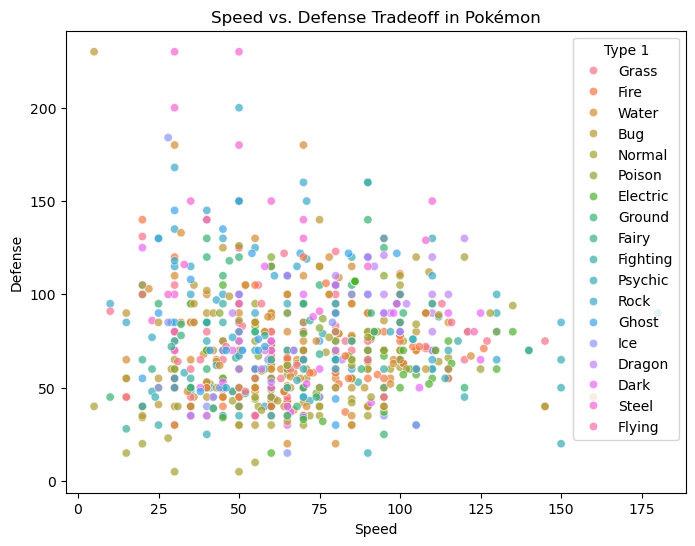

In [68]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Speed", y="Defense", hue="Type 1", alpha=0.7)
plt.title("Speed vs. Defense Tradeoff in Pokémon")
plt.xlabel("Speed")
plt.ylabel("Defense")
plt.show()

# The faster you are, the less defense you seem to have

- [] **Best BST Team per Pokedex # range** (e.g., 1-50, 2-10, 300-567, etc.) Remember, you can only have one mega, no duplicates (e.g. Mewtwo and Mega Mewtwo Y), and only one Pokémon form per team (e.g. Heat Rotom and Mow Rotom). 

In [262]:
# df = pd.read_csv("clean_pokemon_data.csv")

# df = df.drop(columns=["Unnamed 0"])

df["BST"] = df.iloc[:,5:11].sum(axis=1)  # Summing HP, Attack, Defense, etc. for this new df that has an extra column

all_types = set(df["Type 1"].unique())

all_entries = set(df["#"].unique())   # all_entries = sorted(df["#"].unique())   this one is now a list, maybe this one works better

leg_status = set(df["Legendary"].unique())


Best_per_entry = {}

for u_type in all_types:
    for leg in leg_status:
        for start in all_entries:
            for finish in all_entries:
                top_entries = df.loc[((df["Type 1"] == u_type) | (df["Type 2"] == u_type))
                & (df["Legendary"] == leg) & (df["#"] >= start) & (df["#"] <= finish)].sort_values(by="BST", ascending=False).head(6)
                Best_per_entry[(u_type,leg,start,finish)] = top_entries

Best_per_entry["Fire",False,15,25]

# Figure this one out

KeyboardInterrupt: 

- [x] **This one is a specific example but it works. The only issue now is trying to implement it in the above for loops (or do it some other way)**

In [75]:
import re

# df.drop(columns="Unnamed: 0")
df = pd.read_csv("clean_pokemon_data.csv")  

df["BST"] = df.iloc[:,5:11].sum(axis=1)  # Be careful with this one, in other cells you may reload the dataframe and the columns are different


def base_name(Name):
    return re.sub(r"Normal|Attack|Mega|Defense|Speed|Altered|Origin|Incarnate|Primal|Mode|Heat|Wash|Frost|Fan|Mow|Zen|Standard|Therian|Primal|Ash|Ordinary|Resolute|Aria|Pirouette|Blade|Shield|50%|Form|Land|Sky|(|)|Complete|10%|Black|White|Confined|Unbound","",Name).strip()

# We don't need Mega here since we're applying this to a non-megas dataframe, but just for generalization I'll keep it there

# This gives you the best mega for 50-500: (out of various megas)

mega_entries = df.loc[((df["Type 1"] == "Fire") | (df["Type 2"] == "Fire"))
& (df["Legendary"] == False) & (df["#"] >= 50) & (df["#"] <= 500) & (df["Name"].str.contains("Mega")) ].sort_values(by="BST", ascending=False).head(1)


mega_entries["Base name"] = mega_entries["Name"].apply(base_name)

the_one= mega_entries.iloc[0,-1]   # search for the name that we must use to exclude from non_mega_entries


non_mega_entries = df.loc[((df["Type 1"] == "Fire") | (df["Type 2"] == "Fire"))
& (df["Legendary"] == False) & (df["#"] >= 50) & (df["#"] <= 500) 
& (~df["Name"].str.contains("Mega"))
& (~df["Name"].str.contains(the_one)) ].sort_values(by="BST", ascending=False)


non_mega_entries["Base name"] = non_mega_entries["Name"].apply(base_name)

non_mega_entries = non_mega_entries.loc[~non_mega_entries.duplicated(subset="Base name", keep="first")]

non_mega_entries = non_mega_entries.head(5).drop(columns=["Base name"])

Total = pd.concat([mega_entries, non_mega_entries]).sort_values(by="BST", ascending = False).drop(columns=["Base name","Unnamed: 0"])

Total




,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST
279,257,Mega Blaziken,Fire,Fighting,80,160,80,130,80,100,3,False,630
64,59,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False,555
518,467,Magmortar,Fire,NaN,75,95,67,125,95,83,4,False,540
171,157,Typhlosion,Fire,NaN,78,84,78,109,85,100,2,False,534
437,392,Infernape,Fire,Fighting,76,104,71,104,71,108,4,False,534
559,500,Emboar,Fire,Fighting,110,123,65,100,65,65,5,False,528


- [x] **Suppose that any Pokémon can Gigantamax and Gigantamaxing doubles the Pokémon's BST. Create a column that doubles the BST using a lambda instruction.**

In [61]:
# Create the BST column again

# df['BST'] = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)
# df['BST'] = df['HP'] + df['Attack'] +df['Defense'] + df['Sp. Atk'] + df['Sp.Def'] + df['Speed']

df['BST'] = df.iloc[:,4:10].sum(axis=1)

# Create a new column for doubled BST using a lambda function

df['Gigantamax BST'] = df['BST'].apply(lambda x: 2*x)

# We could've also done:

# def double(x):
#     return 2*x

# df['Gigantamax BST'] = df['BST'].apply(double)

df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST,Gigantamax BST
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,636
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405,810
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525,1050
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625,1250
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309,618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600,1200
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700,1400
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600,1200
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680,1360


# Data Science

## 8. Inferential Statistics

- [x] **Relationship between Speed and BST** (does higher BST mean higher Speed?).

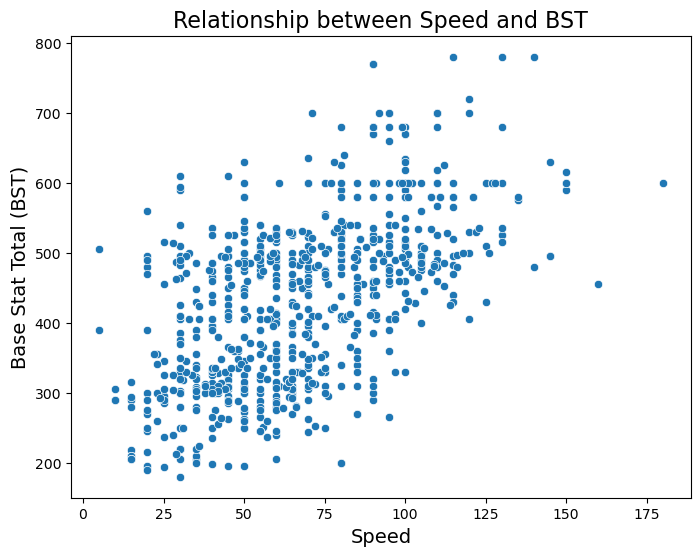

Correlation coefficient between Speed and BST: 0.58


In [62]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Speed', y='BST', data=df)

plt.title('Relationship between Speed and BST', fontsize=16)
plt.xlabel('Speed', fontsize=14)
plt.ylabel('Base Stat Total (BST)', fontsize=14)


plt.show()

correlation = df[['Speed', 'BST']].corr().iloc[0, 1]

print(f"Correlation coefficient between Speed and BST: {correlation:.2f}")

- [x] **Correlation Matrix (Heatmap) for the stats**  

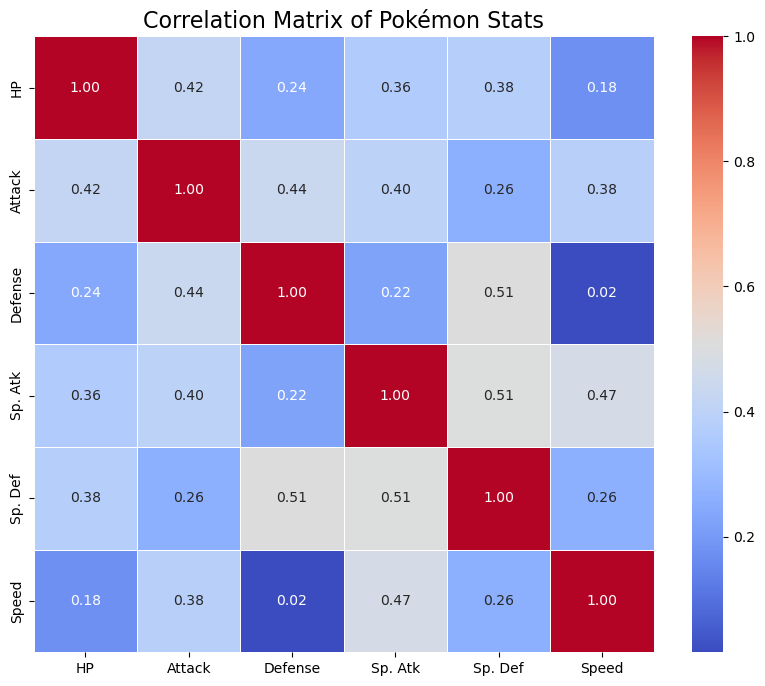

In [54]:
df = pd.read_csv("clean_pokemon_data")

corr_matrix = df.iloc[:,4:10].corr()  

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Pokémon Stats', fontsize=16)
plt.show()

- [x] **Top 3 correlations**

In [97]:
corr_matrix = df.iloc[:,4:10].corr()


corr_matrix = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape), k=0).astype(bool))  # Remove the diagonal by setting them to NaN

top_3_correlations = corr_matrix.unstack().sort_values(ascending=False).head(3)

print(top_3_correlations)

# Sp. Def and Defense seem to go hand in hand in how they grow

Sp. Def  Defense    0.510747
         Sp. Atk    0.506121
Speed    Sp. Atk    0.473018
dtype: float64


- [x] **Top 3 correlations by Generation**

In [311]:
# Do a correlation matrix for each generation

top_correlations_by_gen = {}

for gen, subset in df.groupby("Generation"):
    corr_matrix = subset.iloc[:,4:10].corr()

    # Remove diagonal (self-correlations)
    corr_matrix = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape), k=0).astype(bool))

    top_3_corr = corr_matrix.unstack().sort_values(ascending=False).head(3)

    top_correlations_by_gen[gen] = top_3_corr

top_3_correlations_df = pd.DataFrame(top_correlations_by_gen) # Convert dictionary to DataFrame

top_3_correlations_df

ValueError: could not convert string to float: 'Poison'

# Interlude: 

- From this point forward, we will be using machine learning models to make predictions that will help us answer the question at hand and inform a data-driven decision.

- The first step is to define the specific question we aim to address, which will guide the formulation of the null hypothesis $H_0$ and the alternative hypothesis $H_a$.

- To evaluate these hypotheses, we will rely on a statistical framework. Specifically, we need to compute a test statistic (T), determine the corresponding p-value (p), and establish a confidence interval (L(T),R(T)) for the model’s performance. These metrics will allow us to assess whether there is enough evidence to reject or fail to reject the null hypothesis $H_0$.

- By comparing the observed model performance with what we'd expect by random chance, we can make an informed decision on whether the model is truly effective or just capturing random patterns.

- We first check for baseline probabilities and then compare these to the model's accuracy. If the accuracy is higher than the baseline probabilities, than the model is a better predictor than a random guess.

- As an example, that we'll see later, let's check for the legendary status:

### Expected Counts for Random Guessing:

- For **Legendary Pokémon**, we expect the model to predict **8.13%** correctly (based on the baseline).
- For **Non-Legendary Pokémon**, we expect the model to predict **91.87%** correctly.

### Calculate the Test Statistic (T):

$$T = \sum_i \frac{(O_i - E_i)^2}{E_i}$$

Where:
- $ O_i $ are the observed counts, and
- $ E_i $ are the expected counts under the null hypothesis of random guessing.

### p-value (p):

Once you calculate $ T $, the **p-value** can be obtained by looking up the **chi-square distribution** with the appropriate degrees of freedom (typically 1 degree of freedom for binary classification). If this one is < 0.05 we reject $H_0$.

- We may or may not need a confidence interval.

## 9. Principal Component Analysis (PCA) 

- [x] **Perform a PCA to visualize Pokémon clustering based on stats.**

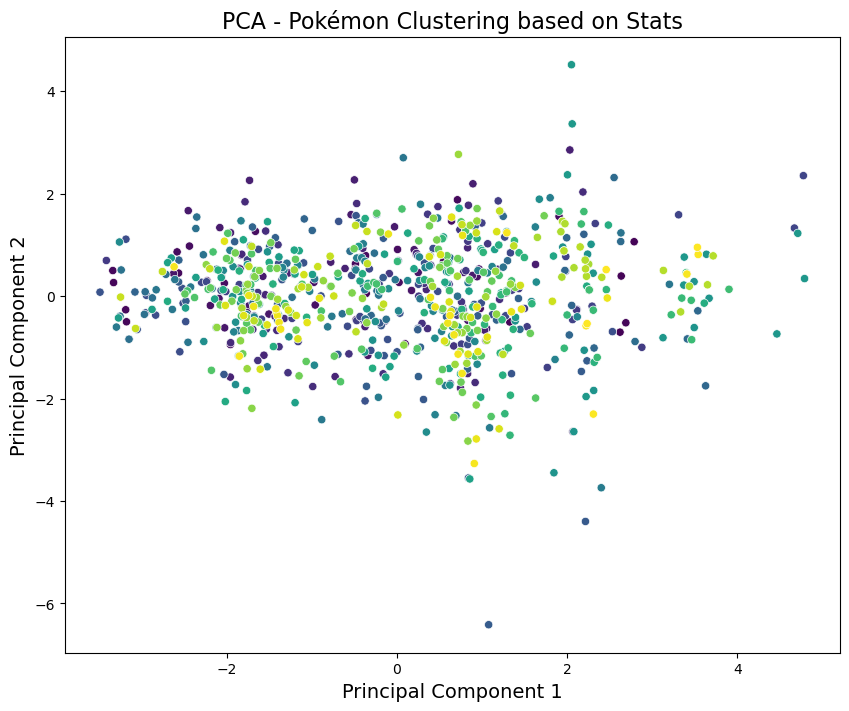

In [394]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]        # or: df.iloc[:,4:10]


scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)


pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)


pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])


pca_df['Pokemon'] = df['Name']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, hue='Pokemon', palette='viridis', legend=None)
plt.title('PCA - Pokémon Clustering based on Stats', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)


plt.show()

### Model's conclusions



## 10. K-Means Clustering

- [x] **Group Pokémon based on stats.**

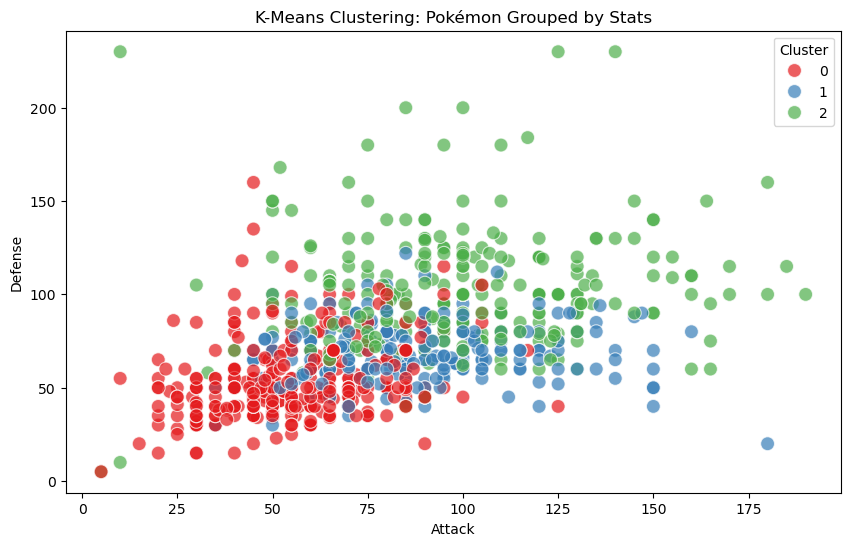

In [64]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


stats = df.iloc[:,4:10]

scaler = StandardScaler()
scaled_stats = scaler.fit_transform(stats)

# Verify that the "elbow" is at k=3:

# inertia=[]
# for k in range(1,11):                                # Assume a range of 1 through 10 (it should be enough)
#     k_m = KMeans(n_clusters = k, random_state=42)
#     k_m.fit(scaled_stats)
#     inertia.append(k_m.inertia_)

# plt.figure(figsize=(8,6))
# plt.plot(range(1,11), marker='o',inertia)
# plt.title('Find the Elbow value')           # This "elbow" value (the integer point where the function starts to become constant) is the most adquate number of clusters for the k-means model 
# plt.show()

# Now use the value k=3

kmeans = KMeans(n_clusters=3, random_state=42)

df['Cluster'] = kmeans.fit_predict(scaled_stats)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Attack', y='Defense', hue='Cluster', palette='Set1', data=df, s=100, alpha=0.7)
plt.title('K-Means Clustering: Pokémon Grouped by Stats')
plt.xlabel('Attack')
plt.ylabel('Defense')

plt.show()


### Model's conclusions

For the most part, the clusters seem seperated, there is some overlap but not much.

## 11. Neural Networks

- [x] **Check how many pokemon have different type combinations**

In [147]:
df.groupby(['Type 1','Type 2']).count()  # counts how many type combinations there are

#  Name  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
Type 1 Type 2                                                             
Bug    Electric   2     2   2       2        2        2        2      2   
       Fighting   2     2   2       2        2        2        2      2   
       Fire       2     2   2       2        2        2        2      2   
       Flying    14    14  14      14       14       14       14     14   
       Ghost      1     1   1       1        1        1        1      1   
...              ..   ...  ..     ...      ...      ...      ...    ...   
Water  Ice        3     3   3       3        3        3        3      3   
       Poison     3     3   3       3        3        3        3      3   
       Psychic    5     5   5       5        5        5        5      5   
       Rock       4     4   4       4        4        4        4      4   
       Steel      1     1   1       1        1        1        1      1   

                 Generation  Legendary  
Type 1 Type 2                           
Bug    Electric           2          2  
       Fighting           2          2  
       Fire               2          2  
       Flying            14         14  
       Ghost              1          1  
...                     ...        ...  
Water  Ice                3          3  
       Poison             3          3  
       Psychic            5          5  
       Rock               4          4  
       Steel              1          1  

[136 rows x 10 columns]

- [x] **Create a function that returns all of the second types, and their occurrences, for a given first type**

In [156]:
all_types = set(df["Type 1"].unique())  

Type_comb = {}  

for u_type in all_types:
    type_counts = df[df["Type 1"] == u_type]["Type 2"].value_counts()
    Type_comb[u_type] = type_counts  

print(Type_comb["Fire"])

Type 2
Fighting    7
Flying      6
Ground      3
Psychic     2
Normal      2
Dragon      1
Rock        1
Steel       1
Water       1
Name: count, dtype: int64


- [] **Find all of the type combinations that don't exist**

In [198]:
# Perhaps make a cartesian product of types (removing double equal types), and subtract from the type combinations that exist in the df

# combinations that exist in the dataframe
def comb_in_df(df):
    type_combinations = {}
    for u_type in all_types:
         type_combinations[u_type] = df[df["Type 1"] == u_type]["Type 2"].dropna().unique().tolist()
    return type_combinations

comb_in_df(df)

# Cartesian product (all possible type combinations)

# Subtract one from the other

{'Steel': ['Ground',
  'Flying',
  'Fairy',
  'Rock',
  'Psychic',
  'Dragon',
  'Fighting',
  'Ghost'],
 'Grass': ['Poison',
  'Psychic',
  'Flying',
  'Dragon',
  'Dark',
  'Fighting',
  'Ground',
  'Ice',
  'Fairy',
  'Steel'],
 'Ice': ['Psychic', 'Flying', 'Ground', 'Water', 'Ghost'],
 'Flying': ['Dragon'],
 'Poison': ['Ground', 'Flying', 'Dark', 'Bug', 'Fighting', 'Water', 'Dragon'],
 'Psychic': ['Fairy', 'Fighting', 'Flying', 'Grass', 'Fire', 'Ghost', 'Dark'],
 'Dragon': ['Flying', 'Fairy', 'Psychic', 'Ground', 'Fire', 'Electric', 'Ice'],
 'Dark': ['Flying',
  'Ice',
  'Fire',
  'Ghost',
  'Fighting',
  'Steel',
  'Dragon',
  'Psychic'],
 'Ghost': ['Poison', 'Flying', 'Dark', 'Dragon', 'Fire', 'Grass'],
 'Rock': ['Ground',
  'Water',
  'Flying',
  'Dark',
  'Psychic',
  'Grass',
  'Bug',
  'Steel',
  'Fighting',
  'Dragon',
  'Ice',
  'Fairy'],
 'Ground': ['Rock',
  'Flying',
  'Dragon',
  'Psychic',
  'Fire',
  'Steel',
  'Dark',
  'Electric',
  'Ghost'],
 'Fire': ['Flying',
  '

- [] **Create a Neural Network that predicts what these new Pokemon's average BST would be, with these new type combinations, based on the average BST found for each type (take the average of the average BSTs for both types)**

In [ ]:
# watch:  https://www.youtube.com/watch?v=kft1AJ9WVDk

# Find the average BST for one type and then the other, and take the average of those two

X = df[['','','']]
y = df['']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = MLPClassifier(hidden_layers=(10,10), max_iter=1000, random_state=42)
model.fit(X_train,y_train)
y_pred= model.predict(y_test)

c_m = confusion_matrix(y_test,y_train)
a_s = accuracy_score(y_test, y_train)

plt.figure(figsize=(8,6))
sns.heatmap(c_m, annot= True, fmt= "d", cmap="Blues")
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.show()

- [] **Create a Neural Network that predicts what the 100 BST allocation will be for these new mega evolutions (assuming the Pokemon maintain their types): Bastiodon, Rampardos, Scizor, Breloom, Wormadam (one for each form), Mothim, Masquerain, Vespiqueen, and Floatzel**

In [93]:
# First we must check the patterns that happen in mega evolutions (asunder from the 100-point BST increase)

X = df[['','','']]
y = df['']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = MLPClassifier(hidden_layers=(10,10), max_iter=1000, random_state=42)
model.fit(X_train,y_train)
y_pred= model.predict(y_test)

c_m = confusion_matrix(y_test,y_train)
a_s = accuracy_score(y_test, y_train)

plt.figure(figsize=(8,6))
sns.heatmap(c_m, annot= True, fmt= "d", cmap="Blues")
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.show()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST
0,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
46,3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
1,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,534
47,6,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
48,6,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,475,Mega Gallade,Psychic,Fighting,68,165,95,65,115,110,4,False,618
44,531,Audino,Normal,NaN,103,60,86,60,86,50,5,False,445
93,531,Mega Audino,Normal,Fairy,103,60,126,80,126,50,5,False,545
45,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600


## 12. Linear Regression

- [x] **Make a linear regression model to predict the Attack stat based on other Pokémon stats**

Mean Absolute Error (MAE): 19.2525
Mean Squared Error (MSE): 620.9099
Root Mean Squared Error (RMSE): 24.9181
R-squared (R²): 0.4262


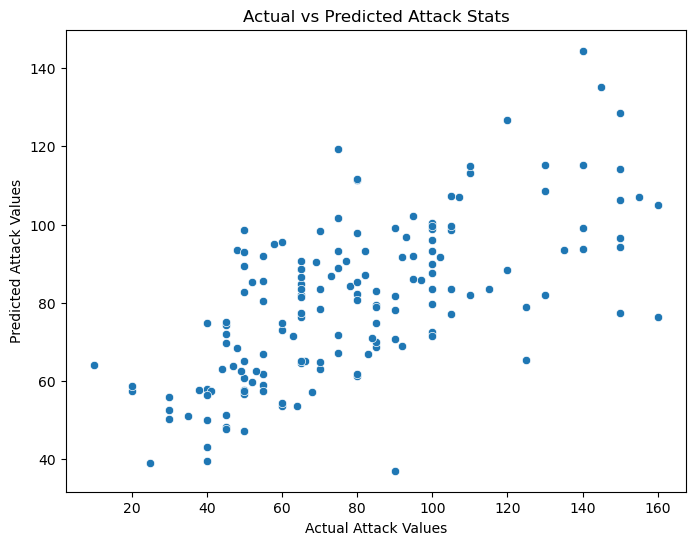

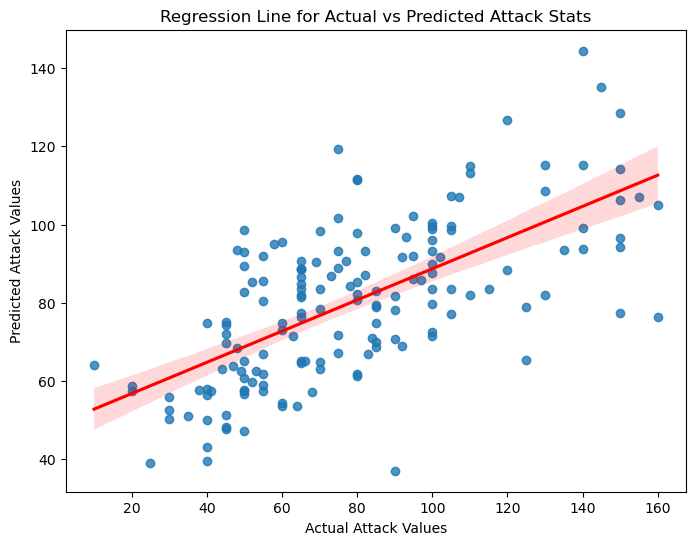

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv('pokemon_data.csv')     # You can read the clean one directly as well

wdf = df.loc[(df["Type 1"] == "Water") | (df["Type 2"] == "Water")]

wdf


X = df[['HP', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = df['Attack']

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
pred_df = pd.DataFrame({"Actual": y_test,"Predicted":y_pred})

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Plot the actual vs predicted values

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Attack Values")
plt.ylabel("Predicted Attack Values")
plt.title("Actual vs Predicted Attack Stats")
plt.show()

# Plot a regression line

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel("Actual Attack Values")
plt.ylabel("Predicted Attack Values")
plt.title("Regression Line for Actual vs Predicted Attack Stats")
plt.show()

### Model Evaluation Conclusions:

- **Mean Absolute Error (MAE)**: 19.25
  - On average, the model's predictions are off by **19.25** points in predicting the **Attack** stat.

- **Mean Squared Error (MSE)**: 620.91
  - The model's errors are significant, as the squared differences between predicted and actual values are relatively high.

- **Root Mean Squared Error (RMSE)**: 24.92
  - The average error is about **24.92** points, suggesting that the model's predictions are often off by a considerable amount.

- **R-squared (R²)**: 0.4262
  - The model explains **42.6%** of the variance in the **Attack** stat, indicating a moderate fit. About **57.4%** of the variance remains unexplained.

### Conclusion:
- The model shows moderate predictive power but has significant room for improvement. The relatively high errors suggest the need for better feature engineering or more complex models.


## 13. Logistic Regression

- [x] **Use a logistic regression model to predict if a Pokémon is Legendary**

Accuracy: 94.38%
Precision: 50.00%
Recall: 23.08%
F1 Score: 57.14%


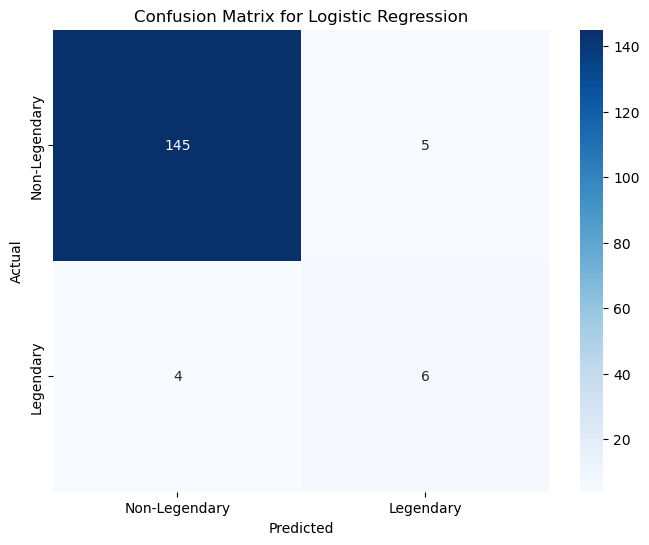

In [60]:
# The Legendary column
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score


X = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = df['Legendary']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

c_m = confusion_matrix(y_test,y_pred)
a_s = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print("Accuracy: {:.2f}%".format(a_s * 100))
print("Precision: {:.2f}%".format(p_s * 100))
print("Recall: {:.2f}%".format(r_s * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

plt.figure(figsize=(8, 6))
sns.heatmap(c_m, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Legendary', 'Legendary'], yticklabels=['Non-Legendary', 'Legendary'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### Model's conclusions

- **Accuracy** is high, but it is not the only important metric, especially with class imbalance.
  
- **Precision** is decent (50%), meaning that when the model predicts Legendary, it gets it right half of the time.

- **Recall** is low (23.08%), indicating that many Legendary Pokémon are missed (False Negatives).

- **F1 Score** is 57.14%, suggesting that the model is not in the ideal range of precision and recall, and has room for improvement, especially in terms of recall.



## Bayesian Optimization 

In [20]:
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("pokemon_data.csv")

X = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']]
y = df['Legendary']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


param_space = {'n_estimators': Integer(50, 300), 'max_depth': Integer(3, 15), 'min_samples_split': Integer(2, 10), 
    'min_samples_leaf': Integer(1, 10), 'criterion': Categorical(['gini', 'entropy']) }

rf = RandomForestClassifier(random_state=42)

bayes_search = BayesSearchCV(rf,param_space,n_iter=30, cv=5,scoring='accuracy',random_state=42,n_jobs=-1)
bayes_search.fit(X_train, y_train)
best_model = bayes_search.best_estimator_
y_pred = best_model.predict(X_test)
a_s = accuracy_score(y_test,y_pred)
c_r = classification_report(y_test,y_pred)

print("Best Parameters:", bayes_search.best_params_)
print("Accuracy on Test Set:", a_s)
print("Classification Report:", c_r)


Best Parameters: OrderedDict({'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 187})
Accuracy on Test Set: 0.95
Classification Report:               precision    recall  f1-score   support

       False       0.96      0.99      0.97       150
        True       0.67      0.40      0.50        10

    accuracy                           0.95       160
   macro avg       0.81      0.69      0.74       160
weighted avg       0.94      0.95      0.94       160



### Model's conclusions

Class Imbalance Issue → Legendary Pokémon (True) have only 10 samples, making predictions harder.

Precision (67%) for Legendary Pokémon → When the model predicts a Pokémon is Legendary, it's correct 67% of the time.

Recall (40%) for Legendary Pokémon → The model only identifies 40% of actual Legendary Pokémon, meaning many are misclassified.

F1-Score (50%) for Legendary Pokémon → The model struggles to balance precision and recall for this class.

Non-Legendary Pokémon (False) are well-predicted → 96% precision, 99% recall, and 97% F1-score show that the model easily identifies non-Legendaries.

## 14. Random Forest and Decision Tree

- [x] **Use a random forest model to predict if a Pokémon is Legendary**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# rf = RandomForestClassifier(n_estimators=100)
# rf.fit(X, y)

X = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']]
y = df['Legendary']  # Target: Binary classification

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(random_state = 42, max_depth=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

c_m = confusion_matrix(y_test,y_pred)
a_s = accuracy_score(y_test,y_pred)
p_s = precision_score(y_test, y_pred)
r_s = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(c_m, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Accuracy: {:.2f}%".format(a_s * 100))
print("Precision: {:.2f}%".format(p_s * 100))
print("Recall: {:.2f}%".format(r_s * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

### Model's conclusions

We have high accuracy (96.25%), decent precision (75%), and a moderate recall (60%). So it was a good use of the model, it's better than random chance prediction.

- [x] **Use a decision tree model to predict Legendary status**

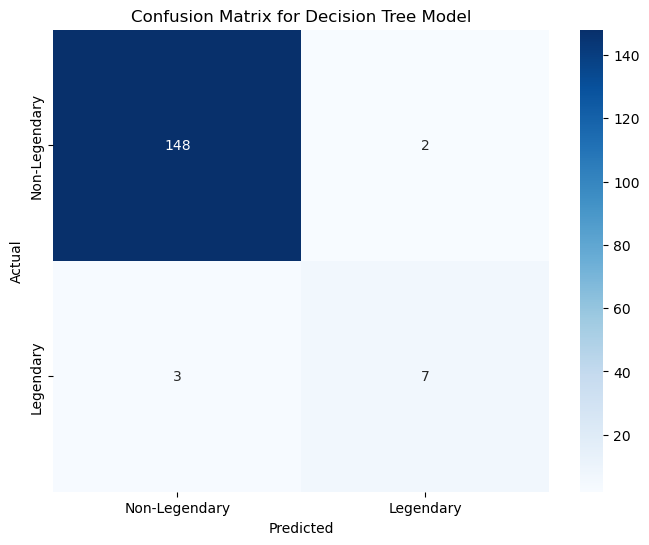

Accuracy: 96.88%
Precision: 77.78%
Recall: 70.00%
F1 Score: 73.68%


In [75]:
from sklearn.tree import DecisionTreeClassifier  # Correct import
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("pokemon_data.csv")

df['Legendary'] = df['Legendary'].map({True: 1, False:0})

X = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']]
y = df['Legendary']  # Target: Binary classification (Legendary: 1, Non-Legendary: 0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limit the tree depth to avoid overfitting
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


c_m = confusion_matrix(y_test, y_pred)
a_s = accuracy_score(y_test, y_pred)
p_s = precision_score(y_test, y_pred)
r_s = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


plt.figure(figsize=(8,6))
sns.heatmap(c_m, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Legendary', 'Legendary'], yticklabels=['Non-Legendary', 'Legendary'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision Tree Model")
plt.show()

# Print performance metrics
print("Accuracy: {:.2f}%".format(a_s * 100))
print("Precision: {:.2f}%".format(p_s * 100))
print("Recall: {:.2f}%".format(r_s * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))


### Model's conclusions

Based on the high accuracy (96.88%), precision (77.78%), and F1 score (73.68%), we fail to reject $H_0$. This suggests that the model does perform well, but to increase the recall (and capture more Legendary Pokémon), further optimization is reqired.

The F1 score is a better measure to consider when dealing with imbalanced classes, as it considers both false positives and false negatives.

- [] **Do a feature importance analysis on **

## 15. Gradient Boosting

- [x] **Use a gradient boosting model to predict if we can predict Legendary status through stats**

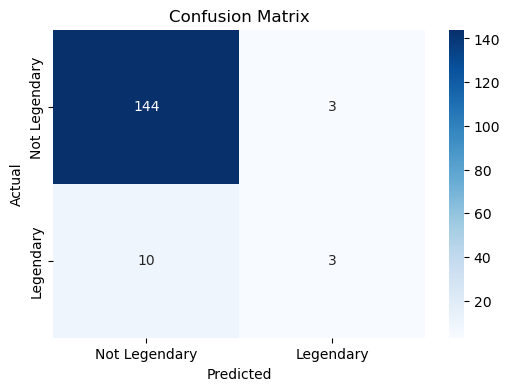

Accuracy: 91.88%
Precision: 50.00%
Recall: 23.08%
F1 Score: 31.58%


In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



X = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = df['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c_m = confusion_matrix(y_test, y_pred)
a_s = accuracy_score(y_test, y_pred)
p_s = precision_score(y_test, y_pred)
r_s = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(c_m, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Legendary", "Legendary"], yticklabels=["Not Legendary", "Legendary"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Accuracy: {:.2f}%".format(a_s * 100))
print("Precision: {:.2f}%".format(p_s * 100))
print("Recall: {:.2f}%".format(r_s * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

## Model Evaluation Metrics

| Metric      | Formula                                      | Value |
|------------|---------------------------------------------|-------|
| **Accuracy**  | $ \frac{TP + TN}{TP + TN + FP + FN} $  | **91.88%** |
| **Precision** | $ \frac{TP}{TP + FP} $                  | **50.00%** |
| **Recall**    | $ \frac{TP}{TP + FN} $                  | **23.08%** |
| **F1 Score**  | $ 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $ | **31.50%** |

### **Confusion Matrix**

\begin{bmatrix}
144 & 3 \\
10 & 3
\end{bmatrix}

- **$h_{11}$ True Negatives (TN) = 144** (Correctly predicted Non-Legendary)
- **$h_{12}$ False Positives (FP) = 3** (Mistakenly classified Non-Legendary as Legendary)
- **$h_{21}$ False Negatives (FN) = 10** (Failed to identify real Legendary Pokémon)
- **$h_{22}$ True Positives (TP) = 3** (Correctly identified Legendary Pokémon)

- Accuracy = 91.88%, meaning the model is correct 91.88% of the time. However, this can be misleading in imbalanced datasets where predicting the majority class (Non-Legendary) correctly dominates the accuracy, even if the model performs poorly for the minority class (Legendary Pokémon).

- Precision = 50.00%, meaning that when the model predicts a Pokémon is Legendary, it is correct 50% of the time. This indicates that the model incorrectly classifies some Non-Legendary Pokémon as Legendary, leading to false positives.

- Recall = 23.08%, meaning the model is able to identify only 23.08% of actual Legendary Pokémon. This indicates that the model misses a significant portion of Legendary Pokémon, labeling them as Non-Legendary instead (false negatives).

- F1 Score = 31.50%, meaning the model is not well-balanced—it struggles to predict Legendary Pokémon well. The F1 score balances both precision and recall, and a low score indicates that the model is not accurately identifying Legendary Pokémon while maintaining precision.

- Given this confusion matrix, we see that stats aren't very good predictors of Legendary status. This is not only because of the class imbalance (Non-Legendary Pokémon dominate the dataset (92%), hence the model is biased toward predicting "Not Legendary") but because the model struggles to distinguish Legendary Pokémon from Non-Legendary Pokémon based on stats alone.

- If stats were strong predictors, we would expect higher recall for Legendary Pokémon.

- However, since only 3 out of 13 actual Legendary Pokémon were correctly classified (recall = 23%), this suggests that stats alone do not significantly help in predicting Legendary status.

## 16. Times Series and Forecasting

- [x] **Create the necessary columns BST and Date**

In [6]:
# Create the BST column again and generate the dates

df = pd.read_csv("pokemon_data.csv")

df['BST']=df.iloc[:,4:10].sum(axis=1)

df["Date"] = pd.date_range(start="2000-01-01", periods=len(df), freq="D") 

df


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST,Date
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,2000-01-01
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405,2000-01-02
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525,2000-01-03
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625,2000-01-04
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309,2000-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600,2002-03-06
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700,2002-03-07
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600,2002-03-08
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680,2002-03-09


- [x] **Separate the date into Months**

In [ ]:
# The date will appear in days but what if we want month markers?
# Let's do the following:

# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set x-ticks to monthly frequency

- [x] **Visualizing BST Trends Over Time**

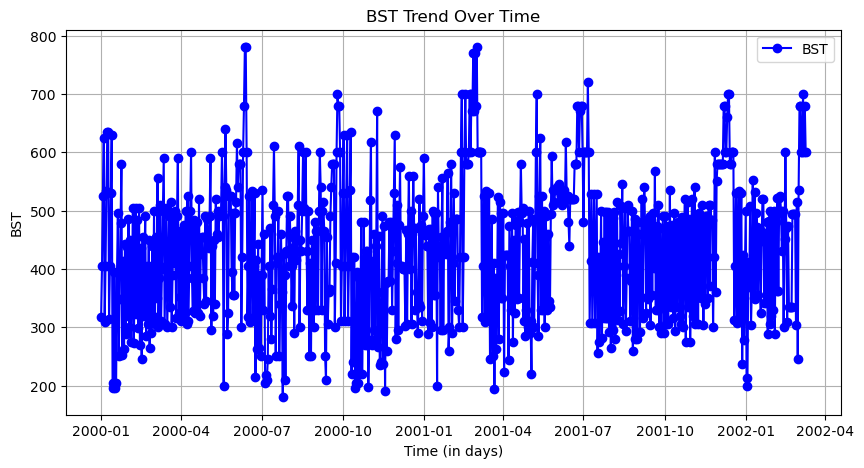

In [91]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["BST"], marker="o", linestyle="-", color="b", label="BST")
plt.xlabel("Time (in days)")
plt.ylabel("BST")
plt.title("BST Trend Over Time")
plt.legend()
plt.grid()
plt.show()

- [x] **Checking for Seasonality in BST**

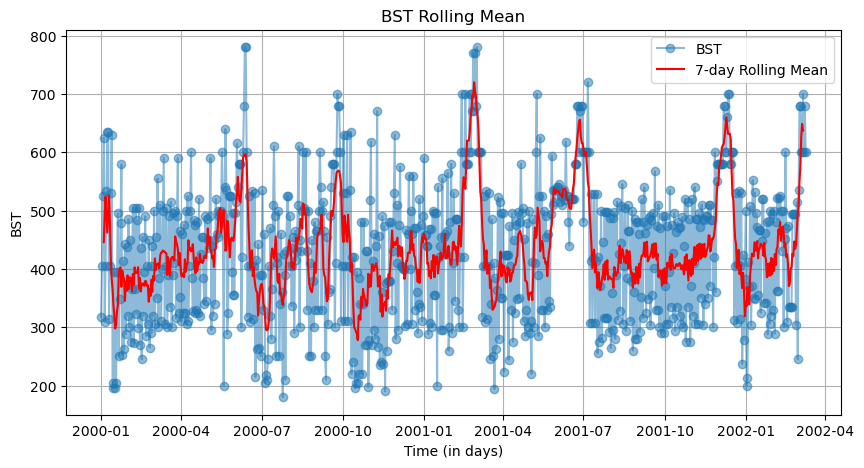

In [77]:
df["BST_rolling"] = df["BST"].rolling(window=7, center=True).mean()  # 7-day rolling mean

plt.figure(figsize=(10, 5))
plt.plot(df.index, df["BST"], marker="o", linestyle="-", alpha=0.5, label="BST")
plt.plot(df.index, df["BST_rolling"], linestyle="-", color="red", label="7-day Rolling Mean")
plt.xlabel("Time (in days)")
plt.ylabel("BST")
plt.title("BST Rolling Mean")
plt.legend()
plt.grid()
plt.show()

- [x] **Checking for Stationarity**

In [12]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df["BST"])
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# It is stationary (p-value < 0,05), so we don't need to apply differencing, however, I'll leave it here:

# df["BST_diff"] = df["BST"].diff().dropna()

# Since the p-value is very low, we can reject the null hypothesis

ADF Statistic: -6.417146034867772
p-value: 1.829332663785839e-08


- [x] **Perform a seasonality decomposition (original data, trend, seasonality, and residuals)**

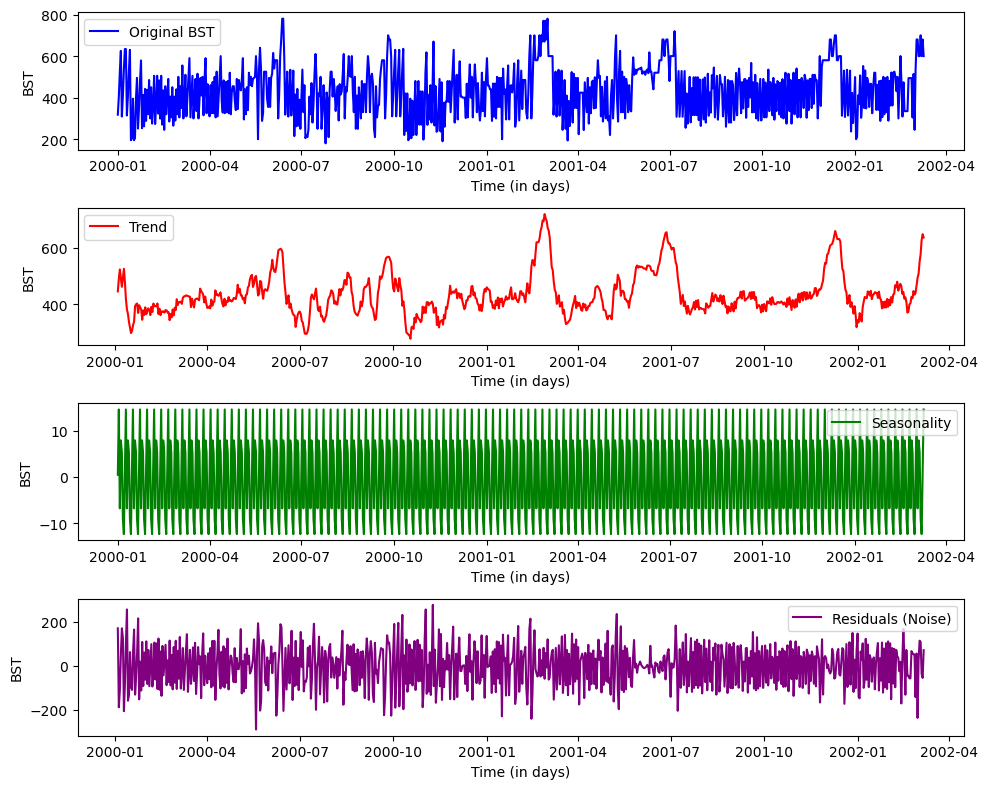

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


decomposition = seasonal_decompose(df["BST"], model="additive", period=7)  # period=7 for weekly seasonality


plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(df.index, df["BST"], label="Original BST", color="blue")
plt.xlabel("Time (in days)")
plt.ylabel("BST")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label="Trend", color="red")
plt.xlabel("Time (in days)")
plt.ylabel("BST")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label="Seasonality", color="green")
plt.xlabel("Time (in days)")
plt.ylabel("BST")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label="Residuals (Noise)", color="purple")
plt.xlabel("Time (in days)")
plt.ylabel("BST")
plt.legend()

plt.tight_layout()
plt.show()

- [x] **Try the ARIMA model**

C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


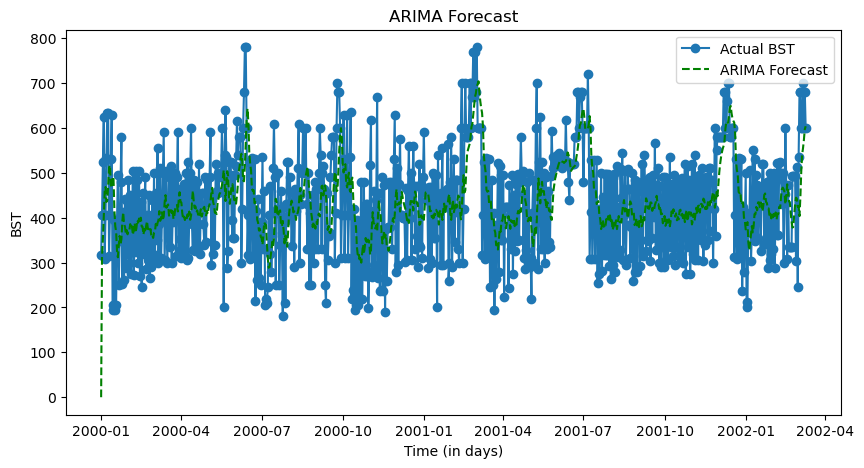

In [83]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df["BST"], order=(1, 1, 1))
fit = model.fit()

df["BST_ARIMA"] = fit.fittedvalues

plt.figure(figsize=(10, 5))
plt.plot(df.index, df["BST"], label="Actual BST", marker="o")
plt.plot(df.index, df["BST_ARIMA"], label="ARIMA Forecast", linestyle="--", color="green")
plt.legend()
plt.xlabel("Time (in days)")
plt.ylabel("BST")
plt.title("ARIMA Forecast")
plt.show()

- [x] **Try the SARIMA model**

C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


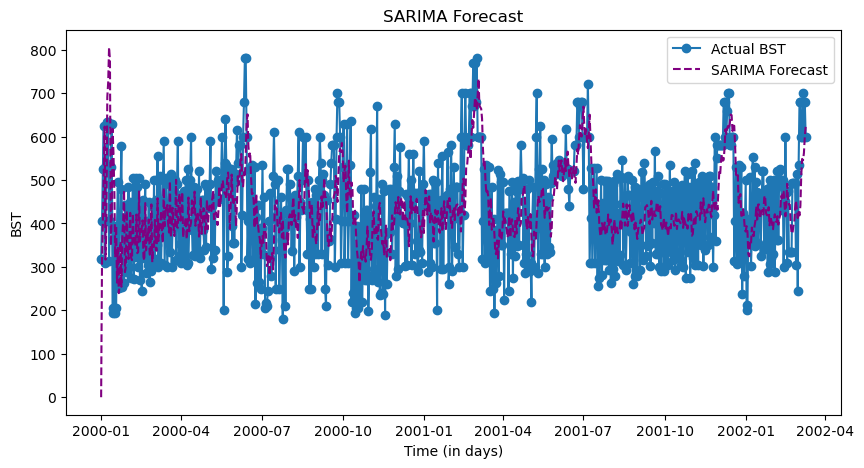

In [85]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df["BST"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
fit = model.fit()

df["BST_SARIMA"] = fit.fittedvalues

plt.figure(figsize=(10, 5))
plt.plot(df.index, df["BST"], label="Actual BST", marker="o")
plt.plot(df.index, df["BST_SARIMA"], label="SARIMA Forecast", linestyle="--", color="purple")
plt.legend()
plt.xlabel("Time (in days)")
plt.ylabel("BST")
plt.title("SARIMA Forecast")
plt.show()


- [x] **Try Exponential Smoothing**

C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


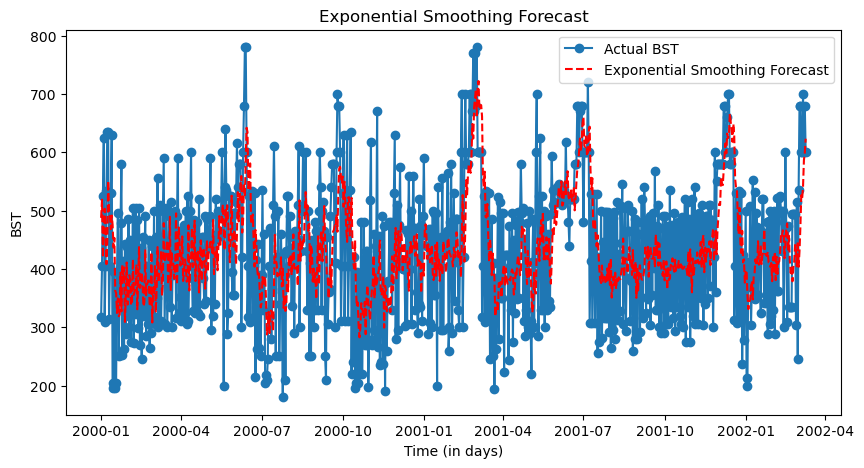

In [87]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(df["BST"], trend="add", seasonal="add", seasonal_periods=7)
fit = model.fit()
df["BST_forecast"] = fit.fittedvalues

plt.figure(figsize=(10, 5))
plt.plot(df.index, df["BST"], label="Actual BST", marker="o")
plt.plot(df.index, df["BST_forecast"], label="Exponential Smoothing Forecast", linestyle="--", color="red")
plt.legend()
plt.xlabel("Time (in days)")
plt.ylabel("BST")
plt.title("Exponential Smoothing Forecast")
plt.show()

- [x] **Predicting future values for the next 30 days**

In [74]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df["BST"], order=(1, 1, 1))  
fit = model.fit()

print(fit.summary())  # Print model summary to ensure it's trained

forecast = fit.forecast(steps=30)
print(forecast)  # This should show an array of predicted BST values

last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq="D") # Generate future dates (30 days ahead)
future_df = pd.DataFrame({"Predicted_BST": forecast}, index=future_dates)

print(future_df.head())


C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    BST   No. Observations:                  800
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4887.350
Date:                Fri, 21 Mar 2025   AIC                           9780.701
Time:                        17:57:30   BIC                           9794.751
Sample:                    01-01-2000   HQIC                          9786.098
                         - 03-10-2002                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1693      0.041     -4.120      0.000      -0.250      -0.089
ma.L1         -0.7552      0.026    -28.672      0.000      -0.807      -0.704
sigma2      1.202e+04    698.545     17.206      0.0

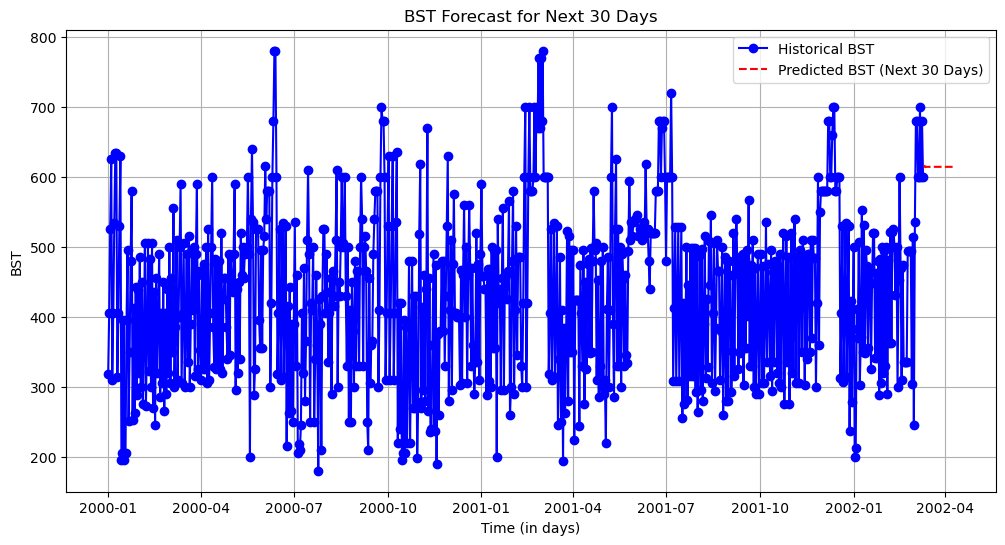

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["BST"], label="Historical BST", marker="o", color="blue")
plt.plot(future_df.index, future_df["Predicted_BST"], label="Predicted BST (Next 30 Days)", linestyle="--", color="red")
plt.xlabel("Time (in days)")
plt.ylabel("BST")
plt.title("BST Forecast for Next 30 Days")
plt.legend()
plt.grid()

plt.show()


# From this we can extrapolate that the arima model is overfitting or underfitting (flat prediction values)
# Also, since the series is stationary, the model doesn't have much "trend" or "seasonality" to pick up on, leading to predictions that just hover around a constant mean value.


# We can experiment with different values for (p,d,q) or change the model

Data science with pyspark (Check kaggle)

- [] **Apply a Random Forest model for the Legendary column**

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol="features", labelCol="Legendary", numTrees=100)
rf_model = rf.fit(df)
rf_predictions = rf_model.transform(df)

rf_predictions.select("Name", "Legendary", "prediction").show(5)


- [] **Apply a Gradient Boost model**

In [ ]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler

# Create feature vector
assembler = VectorAssembler(inputCols=["Attack", "Defense", "Speed", "HP"], outputCol="features")
df = assembler.transform(df)

# Train-test split
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)

# Define Gradient Boosting Model
gbt = GBTClassifier(labelCol="Legendary", featuresCol="features", maxIter=50)

# Train model
gbt_model = gbt.fit(train_df)

# Make predictions
predictions = gbt_model.transform(test_df)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="Legendary", metricName="areaUnderROC")
auc = evaluator.evaluate(predictions)

print(f"Gradient Boosting AUC: {auc:.4f}")

# Show predictions
predictions.select("Name", "Legendary", "prediction", "probability").show(5)


- [] **Apply a Linear Regression model**

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Define feature vector
assembler = VectorAssembler(inputCols=["HP", "Defense", "Sp. Atk", "Sp. Def", "Speed"], outputCol="features")
df = assembler.transform(df)

# Train-test split
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)

# Define Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="Attack")

# Train model
lr_model = lr.fit(train_df)

# Make predictions
predictions = lr_model.transform(test_df)

# Evaluate model
evaluator = RegressionEvaluator(labelCol="Attack", metricName="rmse")
rmse = evaluator.evaluate(predictions)

print(f"Linear Regression RMSE: {rmse:.4f}")

# Show results
predictions.select("Name", "Attack", "prediction").show(5)


- [] **Apply a Neural Network model**

In [ ]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define feature vector
assembler = VectorAssembler(inputCols=["Attack", "Defense", "Speed", "HP"], outputCol="features")
df = assembler.transform(df)

# Train-test split
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)

# Define Neural Network architecture
mlp = MultilayerPerceptronClassifier(labelCol="Legendary", featuresCol="features",
                                     layers=[4, 10, 5, 2],  # Input layer (4), hidden layers (10, 5), output layer (2)
                                     blockSize=128, maxIter=100)

# Train model
mlp_model = mlp.fit(train_df)

# Make predictions
predictions = mlp_model.transform(test_df)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="Legendary", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print(f"Neural Network Accuracy: {accuracy:.4f}")

# Show predictions
predictions.select("Name", "Legendary", "prediction", "probability").show(5)


# Flask API

In [ ]:
from flask import Flask, request, jsonify
import pickle
import findspark
from pyspark.sql import SparkSession
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col
from pyspark.streaming import StreamingContext

# Initialize Spark
findspark.init()
spark = SparkSession.builder.appName("PokemonPrediction").getOrCreate()
ssc = StreamingContext(spark.sparkContext, 10)  # 10-second batch interval

# Load trained model (assuming we have a saved Spark ML model)
model = DecisionTreeClassifier.load("pokemon_model")

# Initialize Flask app
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.json
        
        # Extract input features
        features = [
            data['HP'], data['Attack'], data['Defense'],
            data['Sp. Atk'], data['Sp. Def'], data['Speed'], data['Generation']
        ]
        
        # Convert to Spark DataFrame
        df = spark.createDataFrame([(features,)], ["features"])
        assembler = VectorAssembler(inputCols=["features"], outputCol="features_vec")
        df = assembler.transform(df).select(col("features_vec").alias("features"))
        
        # Make prediction
        prediction = model.transform(df).select("prediction").collect()[0][0]
        
        # Convert to readable format
        result = "Legendary" if prediction == 1 else "Non-Legendary"
        return jsonify({"Prediction": result})
    except Exception as e:
        return jsonify({"Error": str(e)})

Now we will set up Spark Streaming to continuously process incoming match data.

In [ ]:
# Function to process streaming data
def process_streaming_data(rdd):
    if not rdd.isEmpty():
        df = spark.createDataFrame(rdd, ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation"])
        assembler = VectorAssembler(inputCols=["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation"], outputCol="features")
        df = assembler.transform(df).select("features")
        predictions = model.transform(df).select("prediction").collect()
        print("Streaming Predictions:", ["Legendary" if p[0] == 1 else "Non-Legendary" for p in predictions])

# Setup Spark Streaming to listen on port 9999
dstream = ssc.socketTextStream("localhost", 9999)
parsed_stream = dstream.map(lambda line: tuple(map(float, line.split(","))))
parsed_stream.foreachRDD(process_streaming_data)

if __name__ == '__main__':
    ssc.start()  # Start Spark Streaming
    app.run(debug=True)  # Start Flask API

# Deploying Flask API with Spark Streaming to the Cloud:

☁️ Deploying Flask + Spark Streaming API to AWS EC2

1️⃣ Choose a Cloud Service

Popular cloud platforms include:

AWS (Amazon Web Services) → Use EC2 or Lambda

Google Cloud Platform (GCP) → Use Cloud Run or Compute Engine

Microsoft Azure → Use Azure App Services

For a flexible and scalable solution, AWS EC2 is a great option.

2️⃣ Set Up an AWS EC2 Instance

Login to AWS Console → Go to EC2 Dashboard.

Launch an Instance → Choose Ubuntu 20.04 LTS.

Select an Instance Type → Use t2.medium (for Spark support).

Configure Security Group → Open ports:

5000 (Flask API)

9999 (Spark Streaming)

22 (for SSH access)

Launch the instance → Download the key pair (.pem file).

3️⃣ Install Dependencies on the Server

SSH into the instance:

ssh -i your-key.pem ubuntu@your-ec2-public-ip

Install required packages:

sudo apt update && sudo apt upgrade -y
sudo apt install python3-pip -y
pip3 install flask findspark pyspark

Move your Flask API script and trained model to the server:

scp -i your-key.pem pokemon_api.py ubuntu@your-ec2-public-ip:/home/ubuntu/
scp -i your-key.pem pokemon_model ubuntu@your-ec2-public-ip:/home/ubuntu/

4️⃣ Run the Flask API & Spark Streaming

Start the Flask app:

python3 pokemon_api.py

Start Spark Streaming (if needed):

nc -lk 9999

5️⃣ Deploy as a Background Service

Instead of running manually, use Gunicorn & Supervisor to keep the app running:

pip3 install gunicorn
gunicorn -w 4 -b 0.0.0.0:5000 pokemon_api:app

For Spark Streaming, use nohup:

nohup python3 pokemon_api.py &

6️⃣ Get the Public API Endpoint

Find your EC2 Public IP, then test the API:

curl -X POST "http://your-ec2-public-ip:5000/predict" -H "Content-Type: application/json" -d '{"HP": 90, "Attack": 120, "Defense": 100, "Sp. Atk": 150, "Sp. Def": 90, "Speed": 120, "Generation": 5}'

🎉 Your Pokémon Prediction API is live!

# Make this dataframe usable on MySQL Server

- [x] **The original file**

In [360]:
# For the columns to be callable, they need to either have only one word or words separated by "_" and not a space, and not have "." in them
# This here is one approach to renaming two columns (we still have to deal with the Sp. Atk and Sp. Def columns)

df= pd.read_csv("pokemon_data.csv")

df["Type_1"] = df["Type 1"]
df["Type_2"] = df["Type 2"]
 
df.drop("Type 1", axis=1, inplace=True)
df.drop("Type 2", axis=1, inplace=True)

new_order = list(df.columns[:2]) + [df.columns[-2]] + [df.columns[-1]] + list(df.columns[2:10])


df= df[new_order]

# df.to_csv("SQL_pokemon_data.csv")


# Another solution is: df.rename(columns={"Type 1": "Type_1", "Type 2": "Type_2"}, inplace=True)

# The most general solution is: df.columns = [col.replace(" ", "_") for col in df.columns]   for cases where you have a lot of columns

# If this downloads as an xls file, go on Google and search for "xls to csv|Cloud convert" and convert that file to csv, it should work

In [53]:
# Change everything:

df= pd.read_csv("pokemon_data.csv")

df.rename(columns={"Type 1": "Type_1", "Type 2": "Type_2", "Sp. Atk": "Sp_Atk", "Sp. Def" : "Sp_Def"}, inplace=True)

df

df.to_csv("SQL_pokemon_data.csv")

- [x] **The clean file**

In [49]:
df= pd.read_csv("clean_pokemon_data.csv")


df.rename(columns={"Type 1": "Type_1", "Type 2": "Type_2", "Sp. Atk": "Sp_Atk", "Sp. Def" : "Sp_Def"}, inplace=True)

df = df.drop(columns=["Unnamed: 0"])

# In case you need a new order, be careful if two columns are similar they really mess up the data

# new_order = list(df.columns[:2]) + [df.columns[-4]] + [df.columns[-3]] + [df.columns[-1]] + list(df.columns[2:10])

# df= df[new_order]

df

df.to_csv("SQL_clean_pokemon_data.csv")

# Another solution is: df.rename(columns={"Type 1": "Type_1", "Type 2": "Type_2"}, inplace=True)

# The most general solution is: df.columns = [col.replace(" ", "_") for col in df.columns]   for cases where you have a lot of columns

# If this downloads as an xls file, go on Google and search for "xls to csv|Cloud convert" and convert that file to csv, it should work